# Machine Learning Project

<a class="anchor" id="0.1"></a>
# **Table of Contents**

1.	[Importing the Necessary Libraries](#1)
   - 1.1 [Usual Libraries](#1.1)
   - 1.2 [Outliers Library](#1.2)
   - 1.3 [Dummies Library](#1.3)
   - 1.4 [Scaling Libraries](#1.4) 
   - 1.5 [Feature Selection Libraries](#1.5) 
   - 1.6 [Model Selection Libraries](#1.6) 
   - 1.6 [Score Library](#1.7)
2.	[Helpful Functions](#2)      

3.	[Data Loading](#3)  

4.  [Data Exploration](#4)
   - 4.1 [Data Preparation](#4.1)
   - 4.2 [Categorical Variables](#4.2) 
       - 4.2.1 [Nominal Variables ](#4.2.1)
       - 4.2.2 [Ordinal Variables ](#4.2.2)
   - 4.3 [Numerical Variables](#4.3) 
       - 4.3.1 [Discrete Variables ](#4.3.1)
       - 4.3.2 [Continuous Variables ](#4.3.2) 
   - 4.4 [Checking for Nonsense Data](#4.4)

5. [Feature Engineering](#8)

6. [Some Data Visualization](#6)
    - 6.1 [Checking the relation between 1's and 0's in each categorical ](#6.1)

7. [More Data Exploration](#7)
   - 7.1 [Confirming Feature Types](#7.1)
   - 7.2 [Numeric Features vs. Categorical Features](#7.2)
   - 7.3 [Numerical Features](#7.3)
   - 7.4 [Categorical Features](#7.4)

8. [Defining Independent Variables and Target](#8)

9. [Train Test Spliting](#9)

10. [Outliers](#10)
   - 10.1 [Outliers in Numerical Data](#10.1)
   
11. [Encoding Categorical Data](#11)
   - 11.1 [Updating X_train and X_validation datasets)](#11.1)   

12. [Data Scalling](#12)
   - 12.1 [Scaling the Data](#12.1) 
   
13. [Features Selection](#13)
   - 13.1 [Random Forest](#13.1)
   - 13.2 [Combining Method](#13.2)
       - 13.2.1 [A-Nova F Statistic](#13.2.1)
       - 13.2.2 [Chi-Square](#13.2.2)
       - 13.2.3 [Mutual Information](#13.2.3)
    - 13.4 [Ridge](#13.4)
    - 13.5 [Adaboost Classifier](#13.5)
    - 13.6 [RFE](#13.6)     
14. [Model Selection](#14)
    - 14.1 [Cross Validation](#14.1)
    - 14.2 [For Logistic](#14.2)
    - 14.3 [For HistGradientBoost](#14.3)
    - 14.4 [Hyper Tunning for HistGradientBoost](#14.4)
    - 14.5 [For Decision Tree](#14.5)
    - 14.6 [Hyper Tunning for Decision Tree](#14.6)
    - 14.7 [For Gradient Boost](#14.7)
    - 14.8 [Hyper Tunning for Gradient Boosting](#14.8)
    - 14.9 [For Random Forest](#14.9)
    - 14.10 [Hyper Tunning for Random Forest](#14.10)
    - 14.11 [For Neural Network](#14.11)
    - 14.12 [HyperTunning for Neural Network](#14.12)
    - 14.13 [For Gaussian](#14.13)
    - 14.14 [For KNeighbors](#14.14) 

15. [Ensemble](#15)
    - 15.1 [Ensemble for Random Forest Variables](#15.1)
    - 15.2 [Ensemble for Combination Variables](#15.2)
    - 15.3 [Ensemble for Adaboost Classifier Variables](#15.3)
    - 15.4 [Ensemble for Lasso Variables](#15.4)
    - 15.5 [Ensemble for RFE Variables](#15.5)
16. [Loading the Test Dataset](#16)    
17. [Preprocessing the Test Dataset](#17) 
18. [Best Model](#18) 
    - 18.1 [For Random Forest](#18.1)
    - 18.2 [For Combination](#18.2)
    - 18.3 [For Adaboost Classifier](#18.3)
    - 18.4 [For Lasso](#18.4)
    - 18.5 [For RFE](#18.5)
19. [Submission](#19) 

###  Importing the Necessary Libraries <a class="anchor" id="1"></a>

#### Usual Libraries <a class="anchor" id="1.1"></a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from scipy import stats
import datetime as dt
import time
import warnings
warnings.filterwarnings("ignore")

#### Outliers Library <a class="anchor" id="1.2"></a>

In [ ]:
from sklearn.cluster import DBSCAN

#### Dummies  Library <a class="anchor" id="1.3"></a>

In [3]:
from sklearn.preprocessing import  OneHotEncoder

#### Scaling  Libraries <a class="anchor" id="1.4"></a>

In [2]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.neighbors import NearestNeighbors

#### Feature Selection  Libraries <a class="anchor" id="1.5"></a>

In [1171]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.linear_model import RidgeClassifierCV

#### Model Selection  Libraries <a class="anchor" id="1.6"></a>

In [5]:
from sklearn.model_selection import KFold, StratifiedKFold,RepeatedKFold
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import TomekLinks, NearMiss
from collections import Counter
from imblearn.combine import SMOTETomek 
from sklearn.metrics import f1_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, GridSearchCV
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

#### Score Librray <a class="anchor" id="1.7"></a>

In [6]:
from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import recall_score

### Helpful Functions <a class="anchor" id="2"></a>

In [7]:
def dividing_by_zero(x,y):
    try:
        return round(x/y,6)
    except ZeroDivisionError:
        return 0
    
def switch_columns(df, column1, column2):
    column_names = df.columns.to_list()
    index1 = column_names.index(column1)
    index2 = column_names.index(column2)
    column_names[index1] = column2
    column_names[index2] = column1
    df = df.reindex(columns=column_names)
    return df

def NumbtoMonth(month):
    return {
            1: 'January',
            2: 'February',
            3: 'March',
            4: 'April',
            5: 'May',
            6: 'June',
            7: 'July',
            8: 'August',
            9: 'September', 
            10: 'October',
            11: 'November',
            12: 'December'
    }[month]


def TestIndependence(X,y,var,alpha=0.05):   
    dfObserved = pd.crosstab(y,X)
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)
    

def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="gray")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.ylabel("$Frequency$")

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")

    plt.show()

    
def plot_importance(coef,name,threshold):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.axvline(x = threshold, color = "black")
    plt.axvline(x = - threshold, color = "black")
    plt.show()
    
    
def TestIndependence(X,y,var,alpha=0.05):   
    dfObserved = pd.crosstab(y,X)
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

### Data Loading <a class="anchor" id="3"></a>

In [8]:
train = pd.read_csv('train.csv',sep = ',',index_col = 'Access_ID')
train.shape

(9999, 16)

### Data Exploration  <a class="anchor" id="4"></a>

##### Data Preparation <a class="anchor" id="4.1"></a>

In [927]:
data = train.copy()

In [928]:
names_columns = data.columns.to_list()
names_columns.remove('Buy')
names_columns.sort()
names_columns.append('Buy')

In [929]:
data = data.loc[:, names_columns]
data.head()

,AccountMng_Duration,AccountMng_Pages,Browser,Country,Date,FAQ_Duration,FAQ_Pages,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Product_Duration,Product_Pages,Type_of_Traffic,Type_of_Visitor,Buy
Access_ID,,,,,,,,,,,,,,,,
102863333,0.0,0,2,Portugal,21-Mar-20,0.0,0,0.0000,0.0667,0.0000,MacOSX,64.0000,3,1,Returner,0
103117814,0.0,0,2,France,20-May-20,0.0,0,0.0217,0.0449,0.0000,Windows,684.5000,23,6,Returner,0
103201891,0.0,0,4,Italy,4-Dec-20,0.0,0,0.0250,0.0583,0.0000,Windows,95.0000,8,1,Returner,0
103226087,0.0,0,2,United Kingdom,22-Dec-20,0.0,0,0.0000,0.0250,42.4225,Windows,608.7500,9,2,Returner,1
103234445,0.0,0,2,Spain,24-Nov-20,386.0,2,0.0000,0.0093,12.5033,Windows,1609.9397,36,3,Returner,1


In [930]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 102863333 to 798444008
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AccountMng_Duration         9999 non-null   float64
 1   AccountMng_Pages            9999 non-null   int64  
 2   Browser                     9999 non-null   int64  
 3   Country                     9999 non-null   object 
 4   Date                        9999 non-null   object 
 5   FAQ_Duration                9999 non-null   float64
 6   FAQ_Pages                   9999 non-null   int64  
 7   GoogleAnalytics_BounceRate  9999 non-null   float64
 8   GoogleAnalytics_ExitRate    9999 non-null   float64
 9   GoogleAnalytics_PageValue   9999 non-null   float64
 10  OS                          9999 non-null   object 
 11  Product_Duration            9999 non-null   float64
 12  Product_Pages               9999 non-null   int64  
 13  Type_of_Traffic     

No column appears to contain missing values. However, with regard to the types, we can see that some of them are not totally correct. 

##### Categorical Variables <a class="anchor" id="4.2"></a>

###### • Nominal Variables <a class="anchor" id="4.2.1"></a>

- Date
- Country
- OS
- Type_of_Traffic

##### • Ordinal Variables <a class="anchor" id="4.2.2"></a>

- Browser
- Type_of_Visitor

##### Numerical Variables <a class="anchor" id="4.3"></a>

##### • Discrete Variables <a class="anchor" id="4.3.1"></a>

- AccountMng_Pages
- FAQ_Pages
- Product_Pages

##### • Continuous Variables <a class="anchor" id="4.3.2"></a>

- AccountMng_Duration
- FAQ_Duration
- Product_Duration
- GoogleAnalytics_BounceRate
- GoogleAnalytics_ExitRate
- GoogleAnalytics_PageValue

##### Checking for Nonsense Data <a class="anchor" id="4.4"></a>

In [931]:
# datas so podem ser entre fev 2020 e dec 2020 com excepção de abril 
data['Date'] = pd.to_datetime(data['Date'])
data[data['Date'].dt.year != 2020]

data['Date'].dt.month.sort_values().unique()

array([ 2,  3,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [932]:
# we cannot have pages == 0  and time spent on that pages != 0
inconsistent1 = data.loc[~(data['AccountMng_Duration'] == 0)]
inconsistent1.loc[data['AccountMng_Pages'] == 0].index

Int64Index([], dtype='int64', name='Access_ID')

In [933]:
# we cannot have Faq pages == 0  and time spent on that pages != 0
inconsistent2 = data.loc[~(data['FAQ_Duration'] == 0)]
inconsistent2.loc[data['FAQ_Pages'] == 0].index

Int64Index([], dtype='int64', name='Access_ID')

In [934]:
inconsistent3 = data.loc[~(data['Product_Duration'] == 0)]
inconsistent3.loc[data['Product_Pages'] == 0].index

Int64Index([], dtype='int64', name='Access_ID')

Everything is okay according with the wording.

###  Feature Engineering <a class="anchor" id="5"></a>

In [935]:
# before converting 'Date' again to str lets group it by months, that way we can take some conclusions about the most productive months
# and use it instead of the real date
months = data['Date'].dt.month
months.groupby(by = months).count()

Date
2      153
3     1554
5     2732
6      237
7      339
8      347
9      361
10     436
11    2437
12    1403
Name: Date, dtype: int64

In [936]:
data['Date'] = months
data['Date'] = data['Date'].astype('int')

In [937]:
data['Date'] = data['Date'].apply(lambda x: NumbtoMonth(x))

In [938]:
data['Type_of_Traffic'] = data['Type_of_Traffic'].astype('category')
data['Browser'] = data['Browser'].astype('category')

In [939]:
OS_pc = ['MacOSX','Windows','Ubuntu','Fedora','Chrome OS']
OS_phone = ['Android','iOS']

data['OS'] = data['OS'].apply(lambda x: 'PC' if x in OS_pc else ('Phone' if x in OS_phone else x))

In [940]:
# _________________________________________________EXTRA__________________________________________________________________

In [941]:
data.loc[data['OS'] == 'Other', 'OS'] = data['OS'].mode()[0]

data.loc[data['Type_of_Visitor'] == 'Other', 'Type_of_Visitor'] = data['Type_of_Visitor'].mode()[0]

In [942]:
list_non_important_traffic = [7,9,12,14]
list_non_important_browsers = [3,4,5,6,7,8,9,10,11,12,13]
list_non_important_dates = ['February','June','July','August','September','October']
list_non_important_countries = ['Germany', 'Other', 'Italy', 'Switzerland', 'United Kingdom']

data['Type_of_Traffic'] = data['Type_of_Traffic'].apply(lambda x: 'Other Traffic' if x in list_non_important_traffic else (x))
data['Browser'] = data['Browser'].apply(lambda x: 'Other Browser' if x in list_non_important_browsers else (x))
data['Month'] = data['Date'].apply(lambda x: 'Other Date' if x in list_non_important_dates else (x))
data['Country'] = data['Country'].apply(lambda x: 'Other Country' if x in list_non_important_countries else (x))
data = data.drop('Date',axis = 1)

### Some Data Visualization <a class="anchor" id="6"></a>

##### Checking the relation between 1's and 0's in each categorical <a class="anchor" id="6.1"></a>

In [943]:
nominal_features = ["Month", "OS", "Country",'Type_of_Visitor','Browser','Type_of_Traffic']  

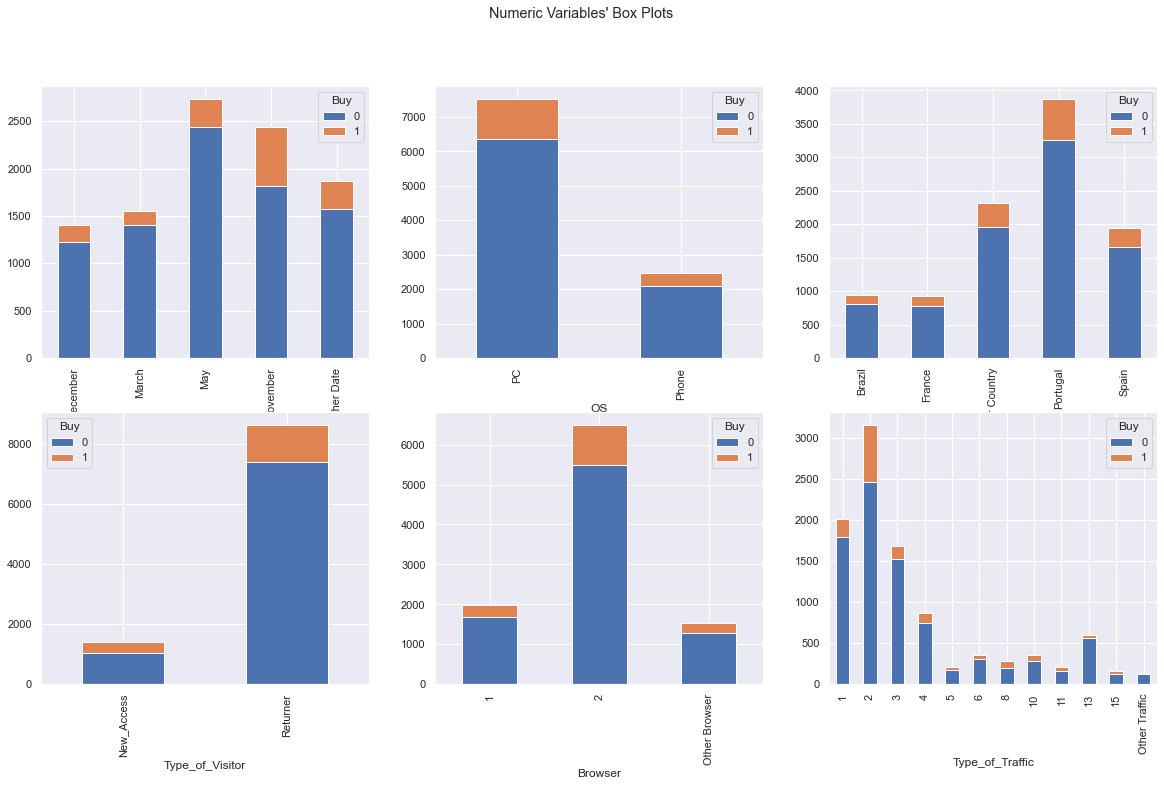

In [944]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, math.ceil(len(nominal_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), nominal_features): # Notice the zip() function and flatten() method
    df_counts = data\
    .groupby([feat, 'Buy'])\
    .size()\
    .unstack()\
    .plot.bar(stacked=True, ax = ax)
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

#plt.savefig(os.path.join('..', 'figures', 'numeric_variables_boxplots.png'), dpi=200)
plt.show()

### 7. More Data Exploration <a class="anchor" id="7"></a>

##### • Confirming Feature Types <a class="anchor" id="7.1"></a>

In [958]:
# Checking for the variables types, once again 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 102863333 to 798444008
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AccountMng_Duration         9999 non-null   float64
 1   AccountMng_Pages            9999 non-null   int64  
 2   Browser                     9999 non-null   object 
 3   Country                     9999 non-null   object 
 4   FAQ_Duration                9999 non-null   float64
 5   FAQ_Pages                   9999 non-null   int64  
 6   GoogleAnalytics_BounceRate  9999 non-null   float64
 7   GoogleAnalytics_ExitRate    9999 non-null   float64
 8   GoogleAnalytics_PageValue   9999 non-null   float64
 9   OS                          9999 non-null   object 
 10  Product_Duration            9999 non-null   float64
 11  Product_Pages               9999 non-null   int64  
 12  Type_of_Traffic             9999 non-null   object 
 13  Type_of_Visitor     

##### Numeric Features vs. Categorical Features <a class="anchor" id="7.2"></a>

In [959]:
non_metric_features = ["Month", "OS", "Country",'Type_of_Visitor','Browser']   
metric_features = ['AccountMng_Duration','AccountMng_Pages','FAQ_Duration','FAQ_Pages','GoogleAnalytics_BounceRate',
                  'GoogleAnalytics_ExitRate','GoogleAnalytics_PageValue','Product_Duration','Product_Pages']

##### • Numeric Features <a class="anchor" id="7.3"></a>

In [960]:
data.describe()

,AccountMng_Duration,AccountMng_Pages,FAQ_Duration,FAQ_Pages,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Product_Duration,Product_Pages,Buy
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,81.205854,2.324232,34.559101,0.508051,0.022305,0.043181,5.963120,1199.769430,31.685869,0.155216
std,179.715545,3.340676,139.796989,1.279390,0.048776,0.048845,18.753626,1958.276304,44.550277,0.362128
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.014300,0.000000,183.562500,7.000000,0.000000
50%,7.500000,1.000000,0.000000,0.000000,0.003200,0.025100,0.000000,599.000000,18.000000,0.000000
75%,92.208350,4.000000,0.000000,0.000000,0.016800,0.050000,0.000000,1470.270800,38.000000,0.000000
max,3398.750000,27.000000,2549.375000,24.000000,0.200000,0.200000,361.763700,63973.522200,705.000000,1.000000


In [948]:
# We have at least one outlier in AccountMng_Duartion, FAQ_Pages, FAQ_Duration, Product_Pages, Product_Duration, 
# GoogleAnalytics_PageValue

##### • Categorical Features <a class="anchor" id="7.4"></a>

In [949]:
data.describe(include = ['O','category'])

,Browser,Country,OS,Type_of_Traffic,Type_of_Visitor,Month
count,9999,9999,9999,9999,9999,9999
unique,3,5,2,12,2,5
top,2,Portugal,PC,2,Returner,May
freq,6484,3870,7517,3150,8608,2732


### Defining Independent Variables and Target  <a class="anchor" id="8"></a>

In [950]:
independent_variables = data.drop('Buy', axis = 1)
target = data['Buy']

### Train Test Spilt <a class="anchor" id="9"></a>

In [951]:
X_train, X_validation, y_train, y_validation = train_test_split(independent_variables,target, test_size = 0.2, random_state = 1, stratify = target, shuffle = True)

In [952]:
X_train.shape, X_validation.shape

((7999, 15), (2000, 15))

### Outliers <a class="anchor" id="10"></a>

####  Outliers in Numerical Data <a class="anchor" id="10.1"></a>

In [853]:
# X_train_outliers = X_train.copy()   

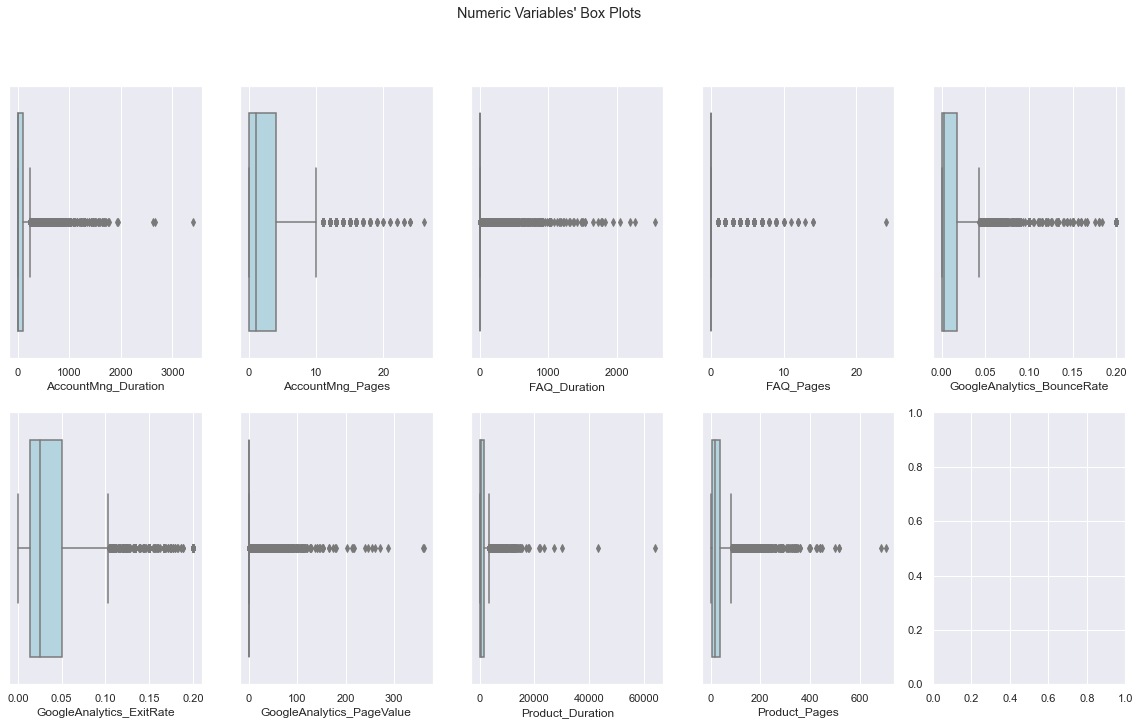

In [854]:
# sns.set()


# fig, axes = plt.subplots(2, math.ceil(len(metric_features) / 2), figsize=(20, 11))

# for ax, feat in zip(axes.flatten(), metric_features): 
#     sns.boxplot(x=X_train_outliers[feat], ax=ax, color = 'lightblue')

# title = "Numeric Variables' Box Plots"

# plt.suptitle(title)

# plt.show()

##### Outliers Detection

- Variable AccountMng_Duration

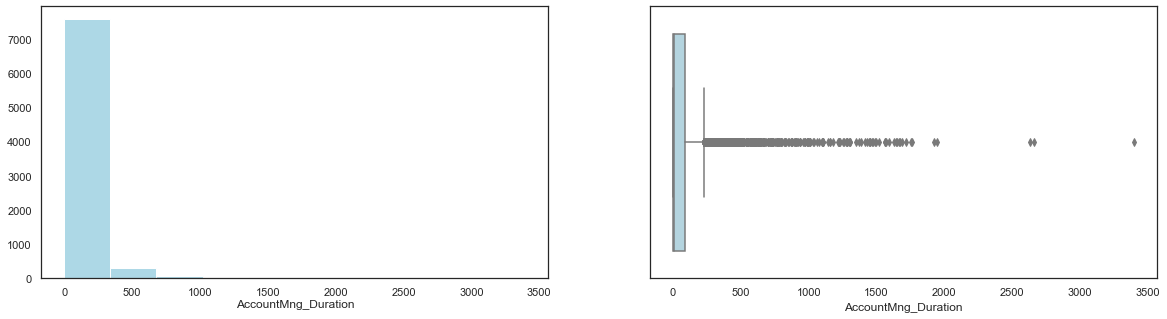

In [855]:
# sns.set()
# sns.set_theme(style="white")
# fig, axes = plt.subplots(1,2,figsize=(20, 5))
# x = X_train_outliers['AccountMng_Duration']
# axes[0].hist(x,color = 'lightblue')
# axes[0].set_title(x.name, y=-0.13)
# sns.boxplot(x=x, ax = axes[1],color = 'lightblue')

# plt.show()

- Variable AccountMng_Pages

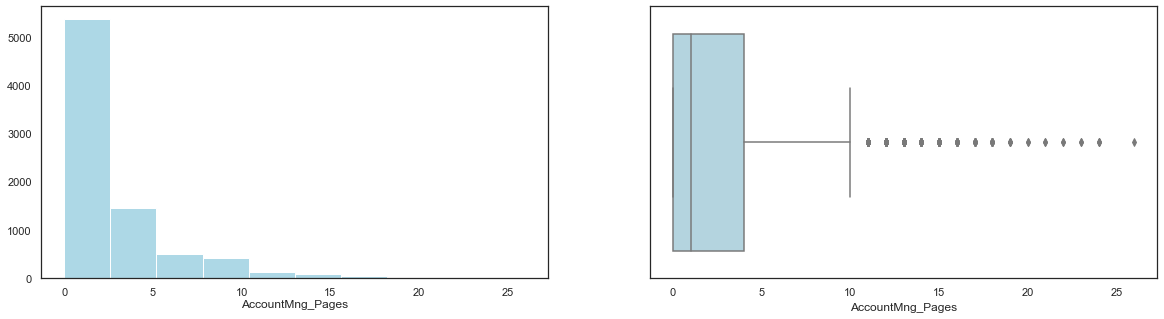

In [856]:
# fig, axes = plt.subplots(1,2,figsize=(20, 5))
# x = X_train_outliers['AccountMng_Pages']
# axes[0].hist(x,color = 'lightblue')
# axes[0].set_title(x.name, y=-0.13)
# sns.boxplot(x=x, ax = axes[1],color = 'lightblue')

# plt.show()

- Variable FAQ_Duration

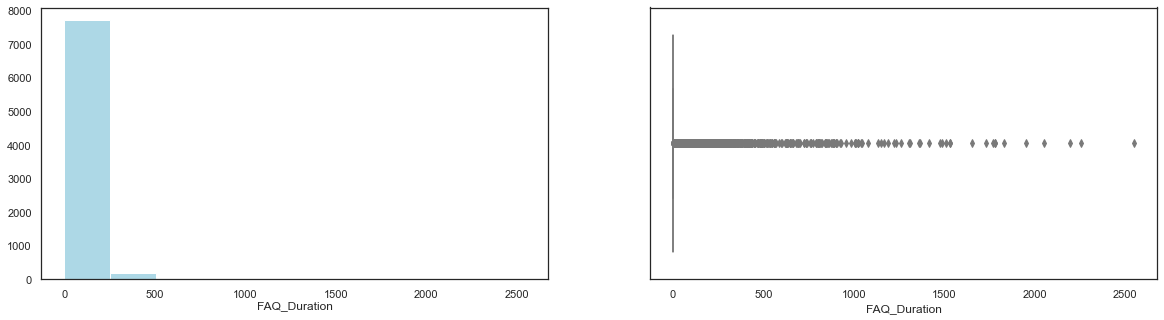

In [857]:
# fig, axes = plt.subplots(1,2,figsize=(20, 5))
# x = X_train_outliers['FAQ_Duration']
# axes[0].hist(x,color = 'lightblue')
# axes[0].set_title(x.name, y=-0.13)
# sns.boxplot(x=x, ax = axes[1],color = 'lightblue')

# plt.show()

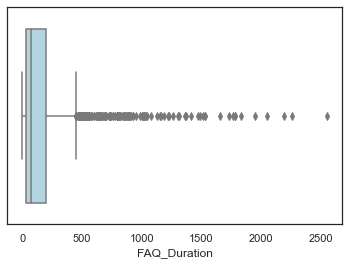

In [41]:
# x = X_train_outliers[X_train_outliers['FAQ_Duration']>0]['FAQ_Duration']
# sns.boxplot(x=x,color = 'lightblue')

# plt.show()

- Variable FAQ_Pages

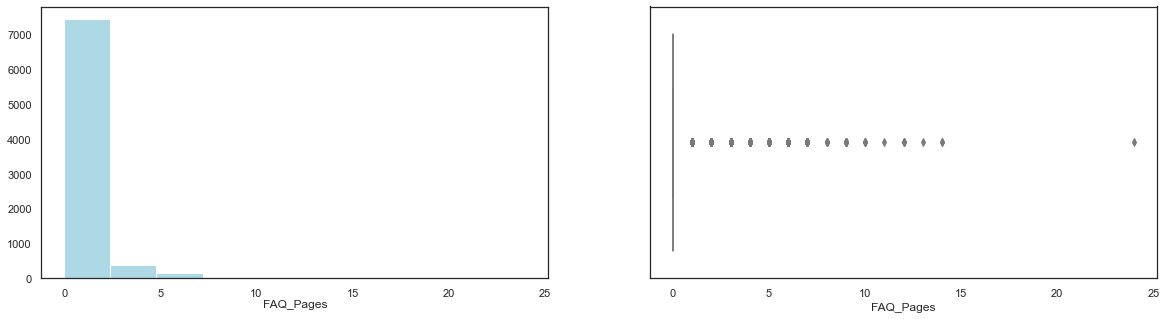

In [42]:
# fig, axes = plt.subplots(1,2,figsize=(20, 5))
# x = X_train_outliers['FAQ_Pages']
# axes[0].hist(x,color = 'lightblue')
# axes[0].set_title(x.name, y=-0.13)
# sns.boxplot(x=x, ax = axes[1],color = 'lightblue')

# plt.show()

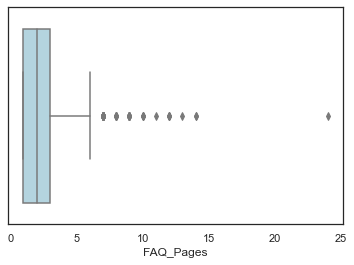

In [43]:
# x = X_train_outliers[X_train_outliers['FAQ_Pages']>0]['FAQ_Pages']
# sns.boxplot(x=x,color = 'lightblue')

# plt.show()

- Variable GoogleAnalytics_BounceRate

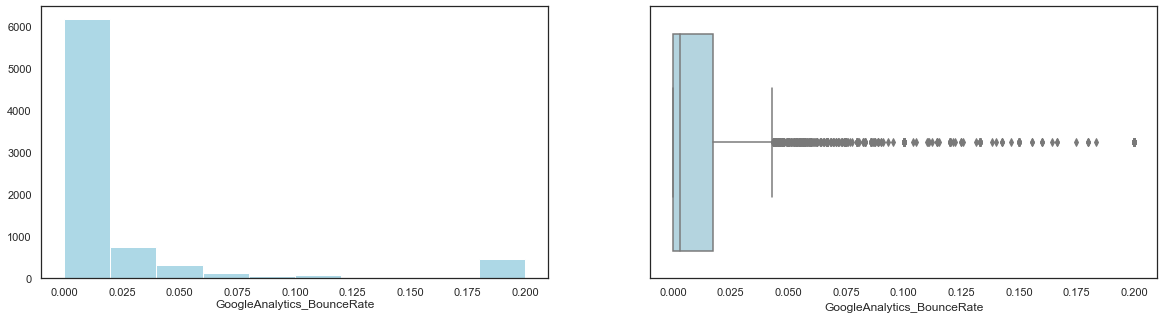

In [44]:
# fig, axes = plt.subplots(1,2,figsize=(20, 5))
# x = X_train_outliers['GoogleAnalytics_BounceRate']
# axes[0].hist(x,color = 'lightblue')
# axes[0].set_title(x.name, y=-0.13)
# sns.boxplot(x=x, ax = axes[1],color = 'lightblue')

# plt.show()

- Variable GoogleAnalytics_ExitRate

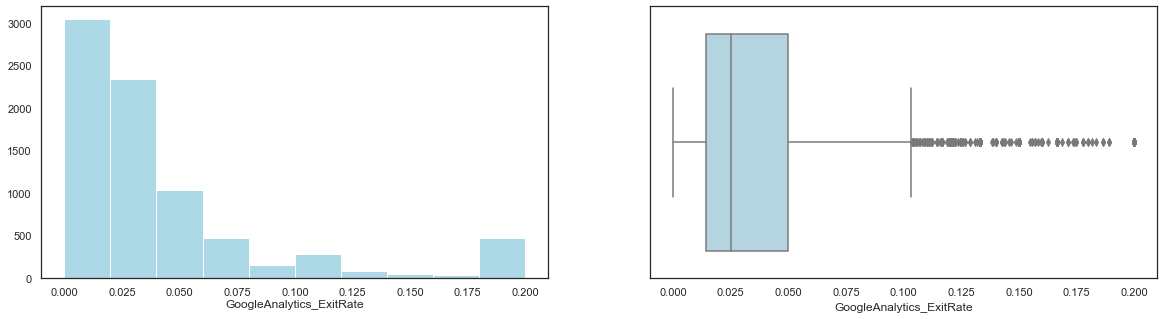

In [45]:
# fig, axes = plt.subplots(1,2,figsize=(20, 5))
# x = X_train_outliers['GoogleAnalytics_ExitRate']
# axes[0].hist(x,color = 'lightblue')
# axes[0].set_title(x.name, y=-0.13)
# sns.boxplot(x=x, ax = axes[1],color = 'lightblue')

# plt.show()

- Variable GoogleAnalytics_PageValue

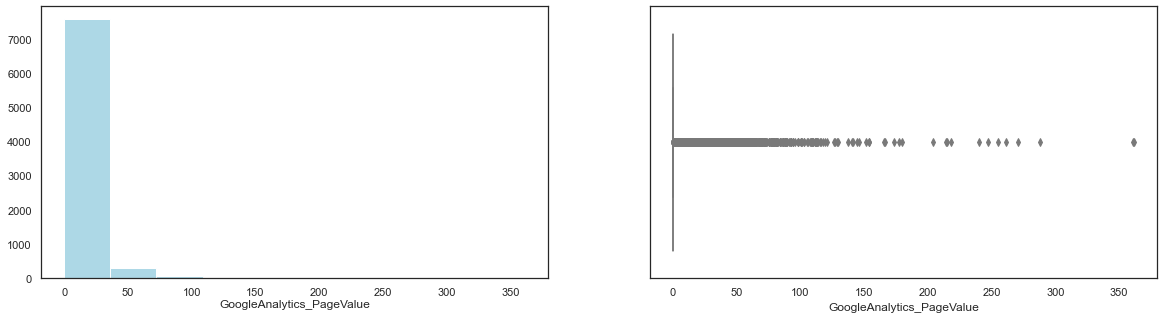

In [46]:
# fig, axes = plt.subplots(1,2,figsize=(20, 5))
# x = X_train_outliers['GoogleAnalytics_PageValue']
# axes[0].hist(x,color = 'lightblue')
# axes[0].set_title(x.name, y=-0.13)
# sns.boxplot(x=x, ax = axes[1],color = 'lightblue')

# plt.show()

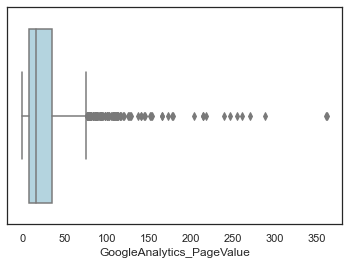

In [47]:
# x = X_train_outliers[X_train_outliers['GoogleAnalytics_PageValue']>0]['GoogleAnalytics_PageValue']
# sns.boxplot(x=x,color = 'lightblue')

# plt.show()

- Variable Product_Duration

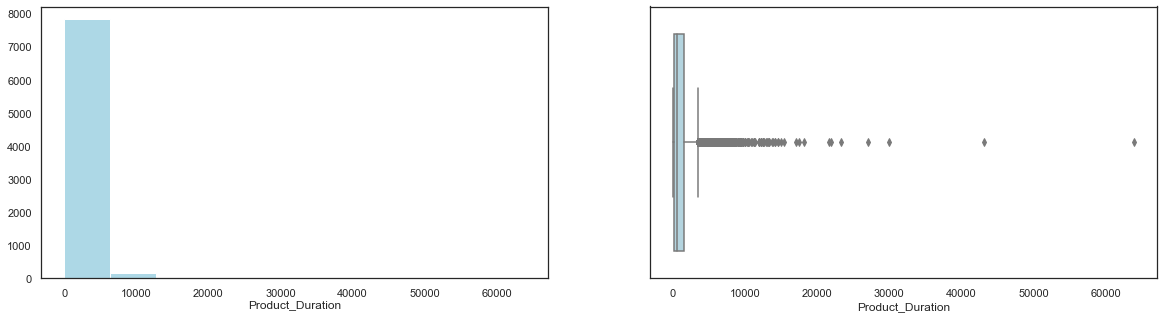

In [48]:
# fig, axes = plt.subplots(1,2,figsize=(20, 5))
# x = X_train_outliers['Product_Duration']
# axes[0].hist(x,color = 'lightblue')
# axes[0].set_title(x.name, y=-0.13)
# sns.boxplot(x=x, ax = axes[1],color = 'lightblue')

# plt.show()

- Variable Product_Pages

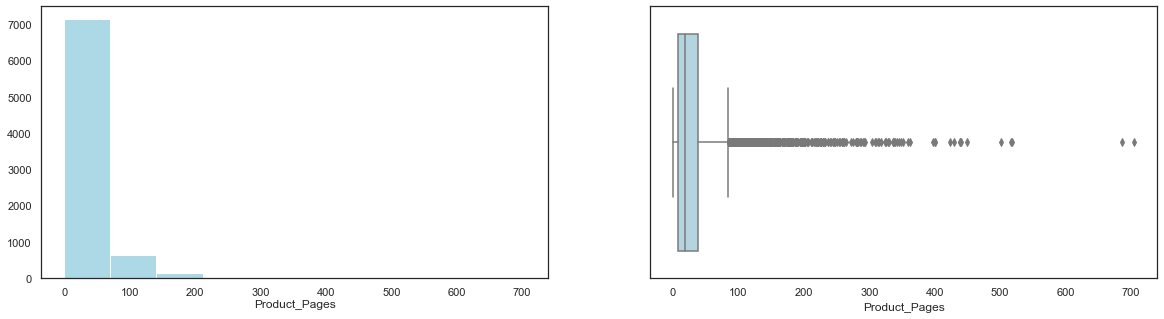

In [49]:
# fig, axes = plt.subplots(1,2,figsize=(20, 5))
# x = X_train_outliers['Product_Pages']
# axes[0].hist(x,color = 'lightblue')
# axes[0].set_title(x.name, y=-0.13)
# sns.boxplot(x=x, ax = axes[1],color = 'lightblue')

# plt.show()

In [50]:
# filters = (
#     (X_train_outliers['AccountMng_Duration']<=1900)   
#     &
#     (X_train_outliers['FAQ_Duration']<=1600)
#     &
#     (X_train_outliers['FAQ_Pages']<=15)
#     &
#     (X_train_outliers['GoogleAnalytics_PageValue']<=200)
#     &
#     (X_train_outliers['Product_Duration']<=20000)
#     &
#     (X_train_outliers['Product_Pages']<=400)
# )
# X_train_filtered = X_train_outliers[filters]

# print('Percentage of data kept after removing outliers:', X_train_filtered.shape[0] / X_train_outliers.shape[0])

Percentage of data kept after removing outliers: 0.9954994374296787


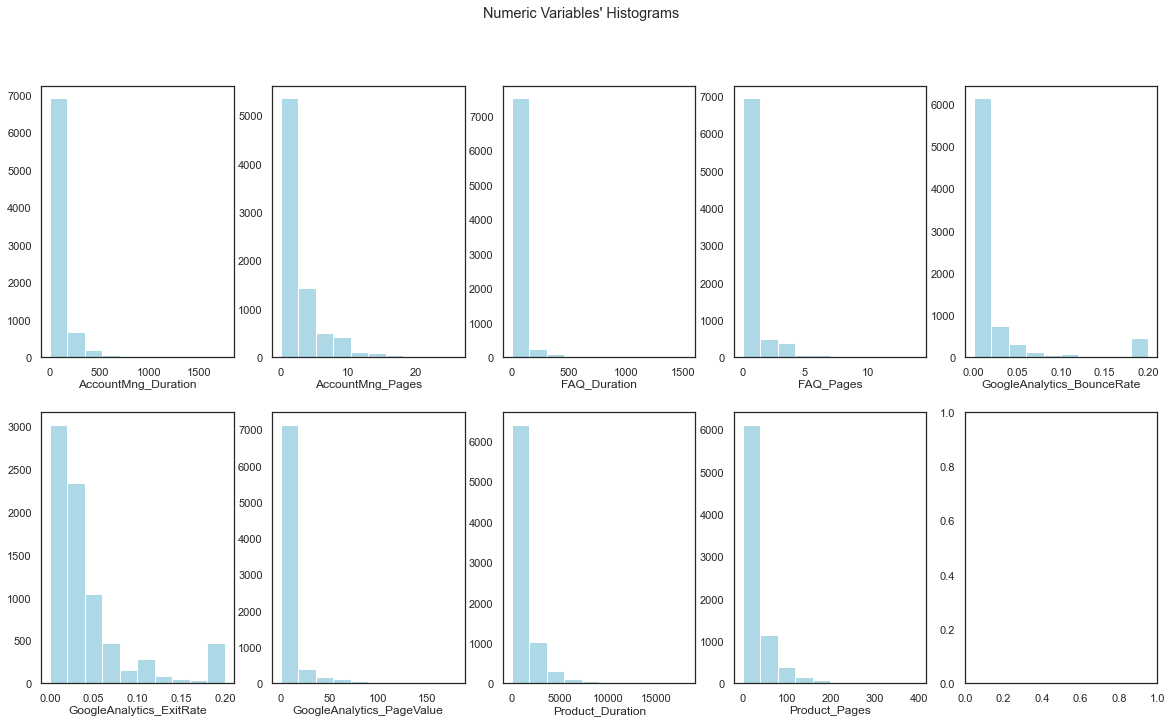

In [51]:
# sns.set_theme(style = 'white')

# fig, axes = plt.subplots(2, math.ceil(len(metric_features) / 2), figsize=(20, 11))

# for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
#     ax.hist(X_train_filtered[feat], color ='lightblue')
#     ax.set_title(feat, y=-0.13)

# title = "Numeric Variables' Histograms"

# plt.suptitle(title)

# plt.show()

In [52]:
# indexes = data.loc[X_train_filtered.index] 

In [53]:
# indexes_0 = indexes.loc[indexes['Buy'] == 0]

In [54]:
# indexes_1 = indexes.loc[indexes['Buy'] == 1]

In [57]:
# X_train_dbscan = indexes_0.copy()
# X_train_input = X_train_dbscan[metric_features]

In [58]:
# X_train_input[X_train_input.columns] = MinMaxScaler().fit_transform(X_train_input)

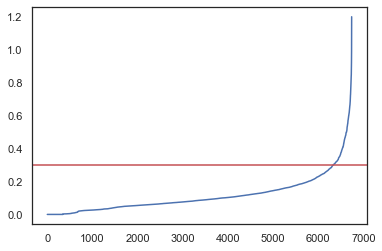

In [59]:
# neigh = NearestNeighbors(n_neighbors = 100)
# neigh.fit(X_train_input)
# distances, _ = neigh.kneighbors(X_train_input)
# distances = np.sort(distances[:, -1])
# plt.plot(distances)
# plt.axhline(y = 0.3, color = 'r')
# plt.show()

In [60]:
# dbscan = DBSCAN(eps = 0.3, min_samples = 100, n_jobs = -1)      
# dbscan_labels = dbscan.fit_predict(X_train_input)

# dbscan_n_clusters = len(np.unique(dbscan_labels))
# print("Number of estimated clusters : %d" % dbscan_n_clusters)

Number of estimated clusters : 2


In [61]:
# X_train_concat = pd.concat([X_train_input, pd.Series(dbscan_labels, index = X_train_input.index, name = "dbscan_labels")], axis = 1)
# X_train_concat.head()

,AccountMng_Duration,AccountMng_Pages,FAQ_Duration,FAQ_Pages,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Product_Duration,Product_Pages,dbscan_labels
Access_ID,,,,,,,,,,
259448731,0.078798,0.083333,0.013072,0.071429,0.039,0.1250,0.0,0.052875,0.088319,0
430925192,0.271684,0.208333,0.052941,0.142857,0.000,0.0355,0.0,0.074593,0.116809,0
625441758,0.071145,0.083333,0.000000,0.000000,0.000,0.1250,0.0,0.008956,0.017094,0
600270594,0.000000,0.000000,0.000000,0.000000,0.125,0.2625,0.0,0.010862,0.056980,0
131813376,0.050454,0.125000,0.000000,0.000000,0.000,0.1875,0.0,0.036074,0.074074,0


In [62]:
# outliers_X_train_scaled = X_train_concat.loc[X_train_concat['dbscan_labels'] == -1]

In [63]:
# outliers_dbscan = X_train_filtered.loc[outliers_X_train_scaled.index]
# outliers_dbscan

,AccountMng_Duration,AccountMng_Pages,Browser,Country,FAQ_Duration,FAQ_Pages,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Product_Duration,Product_Pages,Type_of_Traffic,Type_of_Visitor,Month
Access_ID,,,,,,,,,,,,,,,
751275652,1223.0000,2,2,Portugal,416.0000,4,0.0045,0.0276,0.0000,PC,2755.6709,21,2,Returner,March
256758575,185.9905,6,2,Spain,111.1667,5,0.0026,0.0209,18.0836,PC,10415.7836,179,2,Returner,November
752787358,1215.3333,11,Other Browser,Other Country,0.0000,0,0.0142,0.0339,19.5550,PC,1090.9167,26,2,Returner,May
578326790,359.0000,8,2,Other Country,954.0000,2,0.0000,0.0056,0.0000,PC,336.5000,14,9,Returner,March
649094636,0.0000,0,2,Portugal,1220.0000,1,0.0167,0.0308,0.0000,PC,2389.3333,28,3,Returner,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224456070,35.0000,3,2,Portugal,32.5000,3,0.0124,0.0242,0.0000,PC,11240.9767,290,13,Returner,November
269080453,167.9107,8,2,Other Country,547.7500,6,0.0034,0.0094,44.2198,PC,6340.1524,111,2,Returner,December
175085904,1012.5000,18,2,Other Country,114.3333,6,0.0117,0.0214,1.3077,PC,3163.0968,106,13,Returner,November


In [64]:
# X_train_dbscan = X_train_filtered.drop(index = outliers_X_train_scaled.index)

In [67]:
# print("Percentage of data kept after removing all the outliers:", X_train_dbscan.shape[0]/X_train_outliers.shape[0])

Percentage of data kept after removing all the outliers: 0.9758719839979998


###  Encoding Categorical <a class="anchor" id="11"></a> 

In [963]:
X_train_for_ohc = X_train.copy()
X_validation_for_ohc = X_validation.copy()

In [964]:
for metric in X_train_for_ohc[nominal_features]:
    X_train_for_ohc[metric]= X_train_for_ohc[metric].astype('str')

In [965]:
from sklearn.preprocessing import OneHotEncoder

X_train_ohc = X_train_for_ohc.copy()


ohc = OneHotEncoder(sparse=False, drop="first")
ohc_feat = ohc.fit_transform(X_train_ohc[nominal_features])
ohc_feat_names = ohc.get_feature_names()
ohc_df = pd.DataFrame(index=X_train_ohc.index, columns=ohc_feat_names, data=ohc_feat)    #(watch out about row index)

X_train_ohc = pd.concat([X_train_for_ohc[metric_features], ohc_df], axis=1)
X_train_ohc.head()

,AccountMng_Duration,AccountMng_Pages,FAQ_Duration,FAQ_Pages,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Product_Duration,Product_Pages,x0_March,...,x5_11,x5_13,x5_15,x5_2,x5_3,x5_4,x5_5,x5_6,x5_8,x5_Other Traffic
Access_ID,,,,,,,,,,,,,,,,,,,,,
259448731,139.00,2,20.0,1,0.0078,0.0250,0.0,960.8333,31,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
430925192,479.25,5,81.0,2,0.0000,0.0071,0.0,1355.4833,41,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
625441758,125.50,2,0.0,0,0.0000,0.0250,0.0,162.7500,6,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
600270594,0.00,0,0.0,0,0.0250,0.0525,0.0,197.3778,20,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
131813376,89.00,3,0.0,0,0.0000,0.0375,0.0,655.5357,26,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [966]:
for metric in X_validation_for_ohc[nominal_features]:
    X_validation_for_ohc[metric]= X_validation_for_ohc[metric].astype('str')

In [967]:
X_validation_ohc = X_validation_for_ohc.copy()

ohc = OneHotEncoder(sparse=False, drop="first")
ohc_feat = ohc.fit_transform(X_validation_ohc[nominal_features])
ohc_feat_names = ohc.get_feature_names()
ohc_df = pd.DataFrame(index=X_validation_ohc.index, columns=ohc_feat_names, data=ohc_feat)    #(watch out about row index)

X_validation_ohc = pd.concat([X_validation_for_ohc[metric_features], ohc_df], axis=1)
X_validation_ohc.head()

,AccountMng_Duration,AccountMng_Pages,FAQ_Duration,FAQ_Pages,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Product_Duration,Product_Pages,x0_March,...,x5_11,x5_13,x5_15,x5_2,x5_3,x5_4,x5_5,x5_6,x5_8,x5_Other Traffic
Access_ID,,,,,,,,,,,,,,,,,,,,,
761589646,0.0,0,0.0,0,0.0000,0.0125,0.0000,754.3000,24,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
700417563,0.0,0,0.0,0,0.0000,0.0079,0.0000,1008.4167,31,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
631491699,11.0,1,0.0,0,0.0091,0.0227,0.0000,835.5833,23,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
401749020,0.0,0,0.0,0,0.0081,0.0243,0.0000,2719.7341,74,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107773289,14.0,3,0.0,0,0.0013,0.0143,3.8904,4712.7693,154,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [968]:
X_train_ohc.columns

Index(['AccountMng_Duration', 'AccountMng_Pages', 'FAQ_Duration', 'FAQ_Pages',
       'GoogleAnalytics_BounceRate', 'GoogleAnalytics_ExitRate',
       'GoogleAnalytics_PageValue', 'Product_Duration', 'Product_Pages',
       'x0_March', 'x0_May', 'x0_November', 'x0_Other Date', 'x1_Phone',
       'x2_France', 'x2_Other Country', 'x2_Portugal', 'x2_Spain',
       'x3_Returner', 'x4_2', 'x4_Other Browser', 'x5_10', 'x5_11', 'x5_13',
       'x5_15', 'x5_2', 'x5_3', 'x5_4', 'x5_5', 'x5_6', 'x5_8',
       'x5_Other Traffic'],
      dtype='object')

In [970]:
X_train_ohc = X_train_ohc.rename(columns={"x0_March": "March", "x0_May": "May", "x0_November": "November", "x0_Other Date": "Other_Month", "x2_Portugal": "Portugal", "x2_Spain": "Spain", "x2_France": "France", "x2_Other Country": "Other_Country", "x3_Returner": "Returner","x5_11": "Traffic_11","x5_10": "Traffic_10", "x5_13": "Traffic_13", "x5_15": "Traffic_15", "x5_2": "Traffic_2", "x5_3": "Traffic_3", "x5_4": "Traffic_4", "x5_5": "Traffic_5", "x5_6": "Traffic_6", "x5_8": "Traffic_8", "x5_Other Traffic": "Other_Traffic", "x4_2": "Browser_2", "x4_Other Browser": "Other_Browser", "x1_Phone": "Phone"})
X_validation_ohc = X_validation_ohc.rename(columns={"x0_March": "March", "x0_May": "May", "x0_November": "November", "x0_Other Date": "Other_Month", "x2_Portugal": "Portugal", "x2_Spain": "Spain", "x2_France": "France", "x2_Other Country": "Other_Country", "x3_Returner": "Returner","x5_11": "Traffic_11","x5_10": "Traffic_10", "x5_13": "Traffic_13", "x5_15": "Traffic_15", "x5_2": "Traffic_2", "x5_3": "Traffic_3", "x5_4": "Traffic_4", "x5_5": "Traffic_5", "x5_6": "Traffic_6", "x5_8": "Traffic_8", "x5_Other Traffic": "Other_Traffic", "x4_2": "Browser_2", "x4_Other Browser": "Other_Browser", "x1_Phone": "Phone"})
non_metric_features = ['March', 'May', 'November', 'Other_Month', 'Phone', 'France', 'Other_Country', 'Portugal', 'Spain', 'Returner', 'Traffic_13', 'Traffic_2', 'Traffic_3', 'Traffic_4', 'Other_Traffic', 'Browser_2', 'Other_Browser']

###  Data Scalling <a class="anchor" id="12"></a>

In [971]:
X_train_scaling =X_train_ohc.copy()
X_validation_scaling = X_validation_ohc.copy()
y_train_scaling = y_train.copy()

##### Scaling the Data <a class="anchor" id="12.1"></a>

In [972]:
robust = RobustScaler().fit(X_train_scaling)
X_train_robust = pd.DataFrame(robust.transform(X_train_scaling), columns=X_train_scaling.columns, index = X_train_scaling.index)
X_validation_robust  = pd.DataFrame(robust .transform(X_validation_scaling), columns=X_validation_scaling.columns, index = X_validation_scaling.index)

X_train_scaled = X_train_robust.copy() 
X_validation_scaled = X_validation_robust.copy() 

In [973]:
X_train_scaled.head()

,AccountMng_Duration,AccountMng_Pages,FAQ_Duration,FAQ_Pages,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Product_Duration,Product_Pages,March,...,Traffic_11,Traffic_13,Traffic_15,Traffic_2,Traffic_3,Traffic_4,Traffic_5,Traffic_6,Traffic_8,Other_Traffic
Access_ID,,,,,,,,,,,,,,,,,,,,,
259448731,1.443956,0.25,20.0,1.0,0.267442,-0.008403,0.0,0.277008,0.419355,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
430925192,5.182967,1.00,81.0,2.0,-0.186047,-0.509804,0.0,0.581807,0.741935,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
625441758,1.295604,0.25,0.0,0.0,-0.186047,-0.008403,0.0,-0.339373,-0.387097,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
600270594,-0.083516,-0.25,0.0,0.0,1.267442,0.761905,0.0,-0.312629,0.064516,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
131813376,0.894505,0.50,0.0,0.0,-0.186047,0.341737,0.0,0.041218,0.258065,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [974]:
X_validation_scaled.head()

,AccountMng_Duration,AccountMng_Pages,FAQ_Duration,FAQ_Pages,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Product_Duration,Product_Pages,March,...,Traffic_11,Traffic_13,Traffic_15,Traffic_2,Traffic_3,Traffic_4,Traffic_5,Traffic_6,Traffic_8,Other_Traffic
Access_ID,,,,,,,,,,,,,,,,,,,,,
761589646,-0.083516,-0.25,0.0,0.0,-0.186047,-0.358543,0.0000,0.117497,0.193548,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
700417563,-0.083516,-0.25,0.0,0.0,-0.186047,-0.487395,0.0000,0.313758,0.419355,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
631491699,0.037363,0.00,0.0,0.0,0.343023,-0.072829,0.0000,0.180274,0.161290,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
401749020,-0.083516,-0.25,0.0,0.0,0.284884,-0.028011,0.0000,1.635454,1.806452,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107773289,0.070330,0.50,0.0,0.0,-0.110465,-0.308123,3.8904,3.174728,4.387097,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Feature Selection <a class="anchor" id="13"></a>

In [975]:
X_train_methods = X_train_scaled.copy()
X_validation_methods = X_validation_scaled.copy()

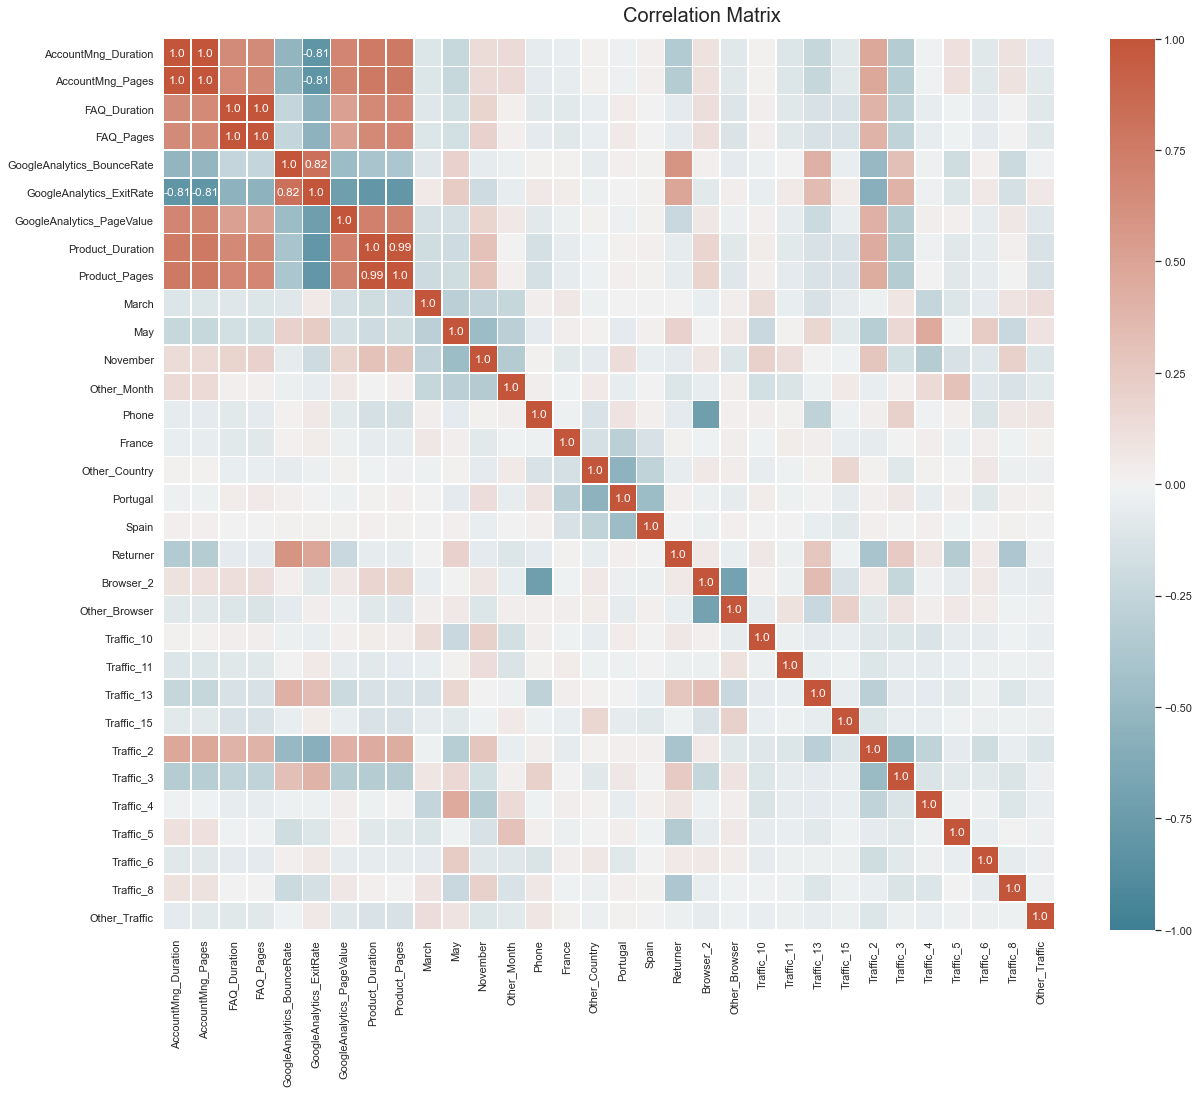

In [976]:
data_corr = X_train_methods.copy()

data_corr = data_corr.corr(method ='spearman')

fig = plt.figure(figsize = (20, 15))

corr = np.round(data_corr.corr(), decimals = 2)

mask_annot = np.absolute(corr.values) >= 0.8

annot = np.where(mask_annot, corr.values, np.full(corr.shape,""))

cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(data = corr, annot = annot, cmap = cmap, fmt = 's', vmin = -1, vmax = 1, center = 0, square = True, linewidths = 0.5)

fig.subplots_adjust(top = 0.95)
fig.suptitle("Correlation Matrix", fontsize = 20)

plt.show()

In [977]:
X_train_methods = X_train_methods.drop(['AccountMng_Duration', 'FAQ_Pages', 'Product_Duration','GoogleAnalytics_ExitRate'],axis = 1)

In [978]:
X_validation_methods = X_validation_methods.drop(['AccountMng_Duration', 'FAQ_Pages', 'Product_Duration','GoogleAnalytics_ExitRate'],axis = 1)

In [979]:
metric_features_update = ['GoogleAnalytics_BounceRate','AccountMng_Pages', 'FAQ_Duration', 'GoogleAnalytics_PageValue',
       'Product_Pages']

In [981]:
non_metric_features_update = ['March', 'May',
       'November', 'Other_Month', 'Phone', 'France', 'Other_Country',
       'Portugal', 'Spain', 'Returner', 'Browser_2', 'Other_Browser',
       'Traffic_10', 'Traffic_11', 'Traffic_13', 'Traffic_15', 'Traffic_2',
       'Traffic_3', 'Traffic_4', 'Traffic_5', 'Traffic_6', 'Traffic_8',
       'Other_Traffic']

#### Random Forest  <a class="anchor" id="13.1"></a>

In [982]:
gini_importance = RandomForestClassifier(random_state=1).fit(X_train_methods, y_train_scaling).feature_importances_
entropy_importance = RandomForestClassifier(criterion='entropy', random_state=1).fit(X_train_methods, y_train_scaling).feature_importances_

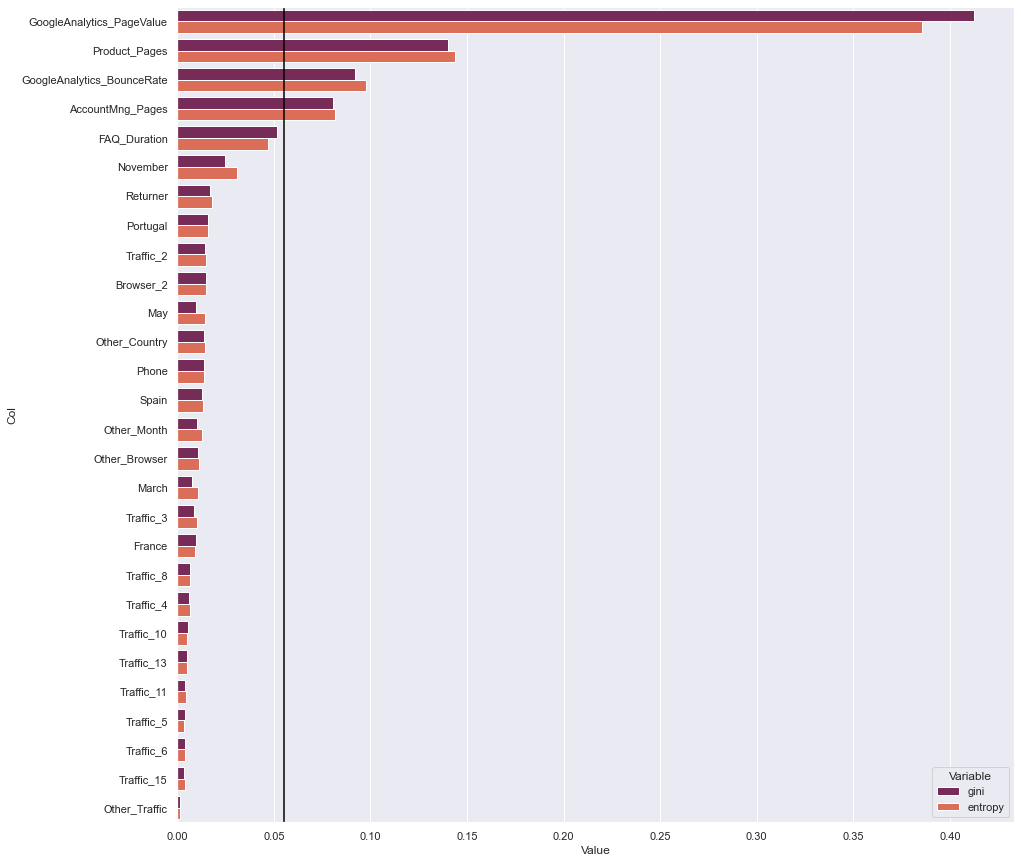

In [983]:
zippy = pd.DataFrame(zip(gini_importance, entropy_importance), columns = ['gini','entropy'])
zippy['col'] = X_train_methods.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,15))
sns.barplot(y='Col', x='Value', hue='Variable', data= tidy,palette = 'rocket')
plt.axvline(x = 0.055, color = "black")
plt.show()

In [984]:
random_forest_features = ['AccountMng_Pages','GoogleAnalytics_BounceRate', 'GoogleAnalytics_PageValue', 'Product_Pages']

### Lasso <a class="anchor" id="13.2"></a>

In [985]:
from sklearn.model_selection import KFold,StratifiedKFold
reg = LassoCV(random_state = 1, n_jobs = -1, cv = StratifiedKFold(n_splits=5, random_state=1, shuffle = True))

reg.fit(X_train_methods, y_train_scaling)

coef = pd.Series(reg.coef_, index = X_train_methods.columns)
coef

AccountMng_Pages              0.006931
FAQ_Duration                  0.000046
GoogleAnalytics_BounceRate   -0.007529
GoogleAnalytics_PageValue     0.008665
Product_Pages                 0.022467
March                        -0.000000
May                          -0.004556
November                      0.080553
Other_Month                   0.008107
Phone                         0.000000
France                        0.000000
Other_Country                -0.000000
Portugal                     -0.000000
Spain                        -0.000000
Returner                     -0.031532
Browser_2                    -0.000000
Other_Browser                 0.000000
Traffic_10                    0.000000
Traffic_11                    0.000000
Traffic_13                   -0.000000
Traffic_15                    0.000000
Traffic_2                     0.009305
Traffic_3                    -0.006033
Traffic_4                     0.000000
Traffic_5                     0.000000
Traffic_6                

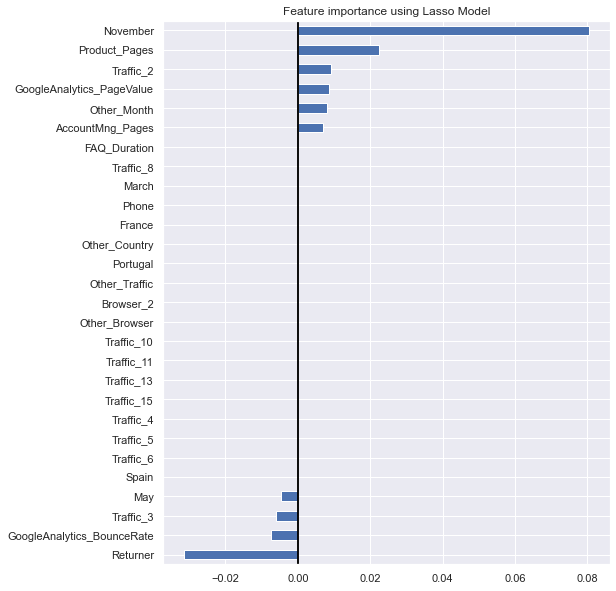

In [986]:
coef.sort_values()

plot_importance(coef,'Lasso',0.0)

In [987]:
coef.loc[(abs(coef) > 0.0)].index

Index(['AccountMng_Pages', 'FAQ_Duration', 'GoogleAnalytics_BounceRate',
       'GoogleAnalytics_PageValue', 'Product_Pages', 'May', 'November',
       'Other_Month', 'Returner', 'Traffic_2', 'Traffic_3'],
      dtype='object')

In [988]:
lasso_features = ['AccountMng_Pages', 'FAQ_Duration', 'GoogleAnalytics_BounceRate',
       'GoogleAnalytics_PageValue', 'Product_Pages', 'May', 'November',
       'Other_Month', 'Returner', 'Traffic_2', 'Traffic_3']

### Combining Methods <a class="anchor" id="13.3"></a>

#### A-Nova F Statistic <a class="anchor" id="13.3.1"></a>

Feature GoogleAnalytics_BounceRate : 185.94615338656763
Feature AccountMng_Pages : 160.2166075616936
Feature FAQ_Duration : 39.6756013520175
Feature GoogleAnalytics_PageValue : 2420.729620529926
Feature Product_Pages : 211.02453419869357


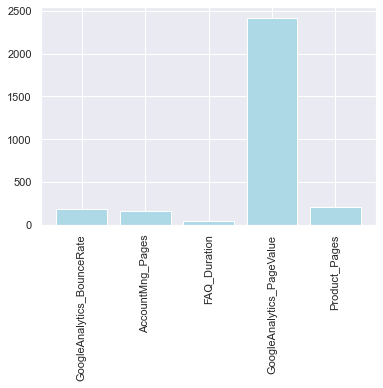

In [989]:
fs = SelectKBest(score_func=f_classif, k='all')

fs.fit(X_train_methods[metric_features_update], y_train_scaling)

X_train_fs = fs.transform(X_train_methods[metric_features_update])

X_validation_fs = fs.transform(X_train_methods[metric_features_update])


for i, metric in enumerate(metric_features_update):
    print('Feature', metric,':', fs.scores_[i])

plt.bar([metric for metric in metric_features_update], fs.scores_,color='lightblue')
plt.xticks(rotation=90)
plt.show() 

In [990]:
anova_features = ['GoogleAnalytics_PageValue']

##### Chi-Square <a class="anchor" id="13.3.2"></a>

In [991]:
for var in X_train_methods[non_metric_features_update]:
    TestIndependence(X_train_methods[non_metric_features_update][var],y_train_scaling, var)

March is IMPORTANT for Prediction
May is IMPORTANT for Prediction
November is IMPORTANT for Prediction
Other_Month is NOT an important predictor. (Discard Other_Month from model)
Phone is NOT an important predictor. (Discard Phone from model)
France is NOT an important predictor. (Discard France from model)
Other_Country is NOT an important predictor. (Discard Other_Country from model)
Portugal is NOT an important predictor. (Discard Portugal from model)
Spain is NOT an important predictor. (Discard Spain from model)
Returner is IMPORTANT for Prediction
Browser_2 is NOT an important predictor. (Discard Browser_2 from model)
Other_Browser is NOT an important predictor. (Discard Other_Browser from model)
Traffic_10 is IMPORTANT for Prediction
Traffic_11 is IMPORTANT for Prediction
Traffic_13 is IMPORTANT for Prediction
Traffic_15 is IMPORTANT for Prediction
Traffic_2 is IMPORTANT for Prediction
Traffic_3 is IMPORTANT for Prediction
Traffic_4 is NOT an important predictor. (Discard Traffi

In [1027]:
chi_squared_features = ['March','May','November','Returner','Traffic_10','Traffic_11','Traffic_13','Traffic_15',
                       'Traffic_2','Traffic_3','Traffic_8']

#### Mutual Information <a class="anchor" id="12.3.3"></a>

In [1028]:
train_cat = X_train_methods[non_metric_features_update].copy()

for colname in train_cat.select_dtypes("object"):
    train_cat[colname], _ = train_cat[colname].factorize()

discrete_features = train_cat.dtypes == int

In [1029]:
mi_scores = mutual_info_classif(train_cat, y_train_scaling, random_state = 1)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=train_cat.columns)

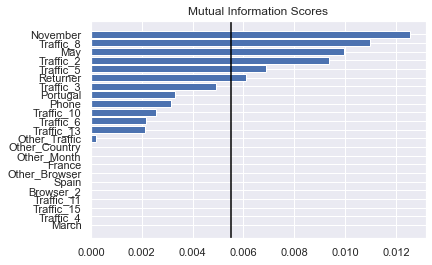

<Figure size 800x500 with 0 Axes>

In [1030]:
mi_scores = mi_scores.sort_values(ascending=True)
width = np.arange(len(mi_scores))
ticks = list(mi_scores.index)
plt.barh(width, mi_scores)
plt.yticks(width, ticks)
plt.axvline(x = 0.0055, color = "black")
plt.title("Mutual Information Scores")
plt.figure(dpi=100, figsize=(8, 5))
plt.show()

In [1036]:
mi_scores[mi_scores >= 0.0055].index

Index(['Returner', 'Traffic_5', 'Traffic_2', 'May', 'Traffic_8', 'November'], dtype='object')

In [1037]:
mi_features = ['Returner', 'Traffic_5', 'Traffic_2', 'May', 'Traffic_8', 'November']

In [1038]:
categorical_features = set(mi_features + chi_squared_features)

In [1039]:
combination_features = list(categorical_features) + anova_features

In [1040]:
combination_features

['Traffic_5',
 'Traffic_2',
 'March',
 'Traffic_10',
 'Traffic_15',
 'November',
 'Traffic_13',
 'Traffic_11',
 'Returner',
 'Traffic_3',
 'Traffic_8',
 'May',
 'GoogleAnalytics_PageValue']

### Ridge <a class="anchor" id="13.4"></a>

In [1005]:
# ridge = RidgeClassifierCV().fit(X_train_methods,y_train_scaling)
# coef_ridge = pd.Series(ridge.coef_[0], index = X_train_methods.columns)
# ridge_predictions = ridge.predict(X_train_methods)
# imp_coef = coef_ridge.sort_values()

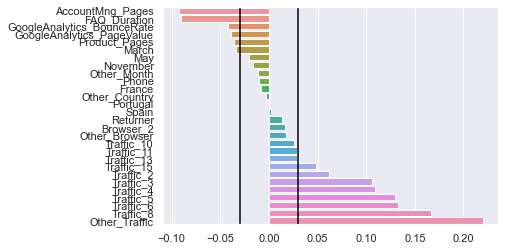

In [1006]:
# sns.barplot(y =X_train_methods.columns,x = imp_coef)
# plt.axvline(x = 0.03, color = "black")
# plt.axvline(x = -0.03, color = "black")
# plt.show()

In [91]:
# ridge_features = ['Returner','Traffic_13','Traffic_12','Traffic_5','May','March','Traffic_1','Product_Pages','Traffic_10',
#                  'Other Date','Traffic_15','Traffic_11','Traffic_8','November']

#### Adaboost Classifier <a class="anchor" id="13.5"></a>

Feature ranking:
Feature AccountMng_Pages : 0.3674786339540961
Feature FAQ_Duration : 0.13961826665257
Feature GoogleAnalytics_BounceRate : 0.09670865944637251
Feature GoogleAnalytics_PageValue : 0.09119336371641529
Feature Product_Pages : 0.06195271543500482
Feature March : 0.024087296948409186
Feature May : 0.018731433039890538
Feature November : 0.018315559019521848
Feature Other_Month : 0.017587073946444612
Feature Phone : 0.016535652275941722
Feature France : 0.015665704105858998
Feature Other_Country : 0.01544328339983194
Feature Portugal : 0.01452594457888714
Feature Spain : 0.012147459072876477
Feature Returner : 0.011659918774521244
Feature Browser_2 : 0.009323156167040922
Feature Other_Browser : 0.009003158421757406
Feature Traffic_10 : 0.008467651535908427
Feature Traffic_11 : 0.008227147800526325
Feature Traffic_13 : 0.00666950762473368
Feature Traffic_15 : 0.006103717504437396
Feature Traffic_2 : 0.005288981190572458
Feature Traffic_3 : 0.004993509594661764
Feature Traffic

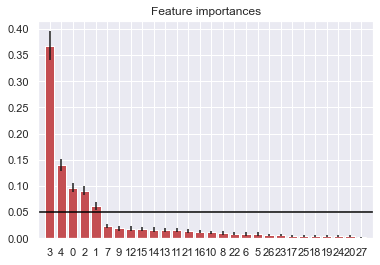

In [1021]:
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X_train_methods, y_train_scaling)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for i, metric in enumerate(X_train_methods.columns.to_list()):
    print('Feature', metric,':', importances[indices[i]])

plt.figure()
plt.title("Feature importances")
plt.bar(X_train_methods.columns, importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks([metric for metric in X_train_methods.columns.to_list()], indices)
plt.xlim([-1, X_train_methods.shape[1]])
plt.axhline(y = 0.05, color = "black")
plt.show()

In [1022]:
adaboost_features = ['AccountMng_Pages','FAQ_Duration','GoogleAnalytics_BounceRate','GoogleAnalytics_PageValue','Product_Pages']

### RFE <a class="anchor" id="13.6"></a>

In [1015]:
models = [LogisticRegression(random_state = 1), DecisionTreeClassifier(random_state = 1),GradientBoostingClassifier(random_state = 1), RandomForestClassifier(random_state=1)]
for model_rfe in models:
    print(model_rfe)
    print('------------------------------------------------------------------')
    kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle = True)
    rfecv = RFECV(estimator=model_rfe, step=1, cv=kfold,scoring='accuracy', n_jobs = -1)   #5-fold cross-validation
    rfecv = rfecv.fit(X_train_methods, y_train_scaling)
    best_score = rfecv.n_features_
    scores = rfecv.grid_scores_

    print('Optimal number of features :', rfecv.n_features_)
    print('Best features :', X_train_methods.columns[rfecv.support_])
    print('Original features :', X_train_methods.columns)
    print('Score:', np.mean(scores))
    print('__')

LogisticRegression(random_state=1)
------------------------------------------------------------------
Optimal number of features : 28
Best features : Index(['AccountMng_Pages', 'FAQ_Duration', 'GoogleAnalytics_BounceRate',
       'GoogleAnalytics_PageValue', 'Product_Pages', 'March', 'May',
       'November', 'Other_Month', 'Phone', 'France', 'Other_Country',
       'Portugal', 'Spain', 'Returner', 'Browser_2', 'Other_Browser',
       'Traffic_10', 'Traffic_11', 'Traffic_13', 'Traffic_15', 'Traffic_2',
       'Traffic_3', 'Traffic_4', 'Traffic_5', 'Traffic_6', 'Traffic_8',
       'Other_Traffic'],
      dtype='object')
Original features : Index(['AccountMng_Pages', 'FAQ_Duration', 'GoogleAnalytics_BounceRate',
       'GoogleAnalytics_PageValue', 'Product_Pages', 'March', 'May',
       'November', 'Other_Month', 'Phone', 'France', 'Other_Country',
       'Portugal', 'Spain', 'Returner', 'Browser_2', 'Other_Browser',
       'Traffic_10', 'Traffic_11', 'Traffic_13', 'Traffic_15', 'Traffic

In [1024]:
rfe_features = ['AccountMng_Pages', 'FAQ_Duration', 'GoogleAnalytics_BounceRate',
       'GoogleAnalytics_PageValue', 'Product_Pages', 'November', 'Returner']

### Model Selection  <a class="anchor" id="14"></a>

#### Cross Validation <a class="anchor" id="14.1"></a>

In [1025]:
def avg_score(X,y,model_):
    score_train = []
    score_val = []
    recall = []
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index],y.iloc[val_index]
        
        sm = SMOTE(random_state = 1,n_jobs = -1)
        oversampled_X, oversampled_y = sm.fit_resample(X_train, y_train)
        
        model = model_.fit(oversampled_X,oversampled_y)
        y_pred_train = model.predict(oversampled_X)
        y_pred_val = model.predict(X_val)
        value_train = f1_score(oversampled_y,y_pred_train)
        value_val = f1_score(y_val,y_pred_val)
        score_train.append(value_train)
        score_val.append(value_val)
        recall.append(recall_score(y_val, y_pred_val))

    print('Train:', np.mean(score_train))
    print('Test:', np.mean(score_val))
    print('Recall', np.mean(recall))
    
    return model

#### For Logistic  <a class="anchor" id="14.2"></a>

In [1041]:
print('Random Forest Features')
avg_score(X_train_methods[random_forest_features],y_train_scaling,LogisticRegression(random_state = 1, n_jobs=-1))
print('----------------------------------------------------------------------')
print('Combination')
avg_score(X_train_methods[combination_features],y_train_scaling,LogisticRegression(random_state = 1, n_jobs=-1))
print('----------------------------------------------------------------------')
print('Adaboost')
avg_score(X_train_methods[adaboost_features],y_train_scaling,LogisticRegression(random_state = 1, n_jobs=-1))
print('----------------------------------------------------------------------')
print('Lasso Regression')
avg_score(X_train_methods[lasso_features],y_train_scaling,LogisticRegression(random_state = 1, n_jobs=-1))
print('----------------------------------------------------------------------')
print('RFE')
avg_score(X_train_methods[rfe_features],y_train_scaling,LogisticRegression(random_state = 1, n_jobs=-1))

Random Forest Features
Train: 0.809028358683269
Test: 0.6460791461199026
Recall 0.746333721984713
----------------------------------------------------------------------
Combination
Train: 0.8078771374159711
Test: 0.5978635625860381
Recall 0.754401476875243
----------------------------------------------------------------------
Adaboost
Train: 0.8115780226183238
Test: 0.6461774070460262
Recall 0.7487465993004275
----------------------------------------------------------------------
Lasso Regression
Train: 0.8167829357388824
Test: 0.625963049056344
Recall 0.774559528436326
----------------------------------------------------------------------
RFE
Train: 0.8153227867788996
Test: 0.6230368548044479
Recall 0.7657144707863713


LogisticRegression(n_jobs=-1, random_state=1)

#### For HistGradientBoost <a class="anchor" id="14.3"></a>

In [1042]:
print('Random Forest Features')
avg_score(X_train_methods[random_forest_features],y_train_scaling,HistGradientBoostingClassifier(random_state=1,warm_start = True,scoring = 'f1'))
print('----------------------------------------------------------------------')
print('Combination')
avg_score(X_train_methods[combination_features],y_train_scaling,HistGradientBoostingClassifier(random_state=1,warm_start = True,scoring = 'f1'))
print('----------------------------------------------------------------------')
print('Adaboost')
avg_score(X_train_methods[adaboost_features],y_train_scaling,HistGradientBoostingClassifier(random_state=1,warm_start = True,scoring = 'f1'))
print('----------------------------------------------------------------------')
print('Lasso Regression')
avg_score(X_train_methods[lasso_features],y_train_scaling,HistGradientBoostingClassifier(random_state=1,warm_start = True,scoring = 'f1'))
print('----------------------------------------------------------------------')
print('RFE')
avg_score(X_train_methods[rfe_features],y_train_scaling,HistGradientBoostingClassifier(random_state=1,warm_start = True,scoring = 'f1'))

Random Forest Features
Train: 0.8792174936531032
Test: 0.6727573751699171
Recall 0.6988567171913461
----------------------------------------------------------------------
Combination
Train: 0.842434455219219
Test: 0.6587688990114364
Recall 0.6755505894545926
----------------------------------------------------------------------
Adaboost
Train: 0.8966169178893872
Test: 0.694084429154937
Recall 0.7278339163104028
----------------------------------------------------------------------
Lasso Regression
Train: 0.9180554749825861
Test: 0.6993279412084723
Recall 0.6739441637517812
----------------------------------------------------------------------
RFE
Train: 0.9399499143838085
Test: 0.7823540437538732
Recall 0.8179913201191864


HistGradientBoostingClassifier(random_state=1, scoring='f1', warm_start=True)

#### Hyper Tunning for HistGradientBoost <a class="anchor" id="14.4"></a>

In [216]:
model_params_clf = {
    'HistGradientBoost' : {
        'model' : HistGradientBoostingClassifier(random_state=1,scoring = 'f1'),
        'params':{
            'learning_rate': [0.001,0.01,0.03,0.05,0.08,1],
            'max_leaf_nodes': [4,8,12,16],
            'max_depth': [2,3,4,5,6,8,10],
        }
    }
}

In [217]:
scores = []

for model_name, mp in model_params_clf.items():
    clf = HalvingGridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False, random_state=0, n_jobs=-1,scoring = 'f1')
    clf.fit(X_train_methods[random_forest_features],y_train_scaling)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'best_estimator': clf.best_estimator_
    })

In [218]:
df_hgb0 = pd.DataFrame(scores, columns=['model','best_score','best_params','best_estimator'])

In [219]:
estimator_hgb0 = df_hgb0['best_estimator'][0] 

In [220]:
scores = []

for model_name, mp in model_params_clf.items():
    clf = HalvingGridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False, random_state=0, n_jobs=-1,scoring = 'f1')
    clf.fit(X_train_methods[combination_features],y_train_scaling)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'best_estimator': clf.best_estimator_
    })

In [221]:
df_hgb1 = pd.DataFrame(scores, columns=['model','best_score','best_params','best_estimator'])

In [222]:
estimator_hgb1 = df_hgb1['best_estimator'][0] 

In [223]:
scores = []

for model_name, mp in model_params_clf.items():
    clf = HalvingGridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False, random_state=0, n_jobs=-1,scoring = 'f1')
    clf.fit(X_train_methods[adaboost_features],y_train_scaling)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'best_estimator': clf.best_estimator_
    })

In [224]:
df_hgb2 = pd.DataFrame(scores, columns=['model','best_score','best_params','best_estimator'])

In [225]:
estimator_hgb2 = df_hgb2['best_estimator'][0] 

In [226]:
scores = []

for model_name, mp in model_params_clf.items():
    clf = HalvingGridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False, random_state=0, n_jobs=-1,scoring = 'f1')
    clf.fit(X_train_methods[lasso_features],y_train_scaling)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'best_estimator': clf.best_estimator_
    })

In [227]:
df_hgb3 = pd.DataFrame(scores, columns=['model','best_score','best_params','best_estimator'])

In [228]:
estimator_hgb3 = df_hgb3['best_estimator'][0] 

In [229]:
scores = []

for model_name, mp in model_params_clf.items():
    clf = HalvingGridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False, random_state=0, n_jobs=-1,scoring = 'f1')
    clf.fit(X_train_methods[rfe_features],y_train_scaling)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'best_estimator': clf.best_estimator_
    })

In [230]:
df_hgb4 = pd.DataFrame(scores, columns=['model','best_score','best_params','best_estimator'])

In [231]:
estimator_hgb4 = df_hgb4['best_estimator'][0] 

In [1043]:
print('Decision Tree')
avg_score(X_train_methods[random_forest_features],y_train_scaling,estimator_hgb0) 
print('----------------------------------------------------------------------')
print('Combination')
avg_score(X_train_methods[combination_features],y_train_scaling,estimator_hgb1)
print('----------------------------------------------------------------------')
print('Adaboost')
avg_score(X_train_methods[adaboost_features],y_train_scaling,estimator_hgb2)
print('----------------------------------------------------------------------')
print('Lasso Regression')
avg_score(X_train_methods[lasso_features],y_train_scaling,estimator_hgb3)
print('----------------------------------------------------------------------')
print('RFE')
avg_score(X_train_methods[rfe_features],y_train_scaling,estimator_hgb4)

Decision Tree
Train: 0.846697621848687
Test: 0.6660920466408091
Recall 0.8115753335924343
----------------------------------------------------------------------
Combination
Train: 0.8503139790864965
Test: 0.6605105384960301
Recall 0.8212495141857754
----------------------------------------------------------------------
Adaboost
Train: 0.8565361061831247
Test: 0.6660920466408091
Recall 0.8115753335924343
----------------------------------------------------------------------
Lasso Regression
Train: 0.8679661239567306
Test: 0.6707348964248844
Recall 0.8067495789610053
----------------------------------------------------------------------
RFE
Train: 0.869271224814716
Test: 0.6650091334481522
Recall 0.8002979660577795


HistGradientBoostingClassifier(learning_rate=0.03, max_depth=4,
                               max_leaf_nodes=8, random_state=1, scoring='f1')

#### For Decision Tree <a class="anchor" id="14.5"></a>

In [1044]:
print('Random Forest Features')
avg_score(X_train_methods[random_forest_features],y_train_scaling,DecisionTreeClassifier(random_state = 1)) 
print('----------------------------------------------------------------------')
print('Combination')
avg_score(X_train_methods[combination_features],y_train_scaling,DecisionTreeClassifier(random_state = 1))
print('----------------------------------------------------------------------')
print('Adaboost')
avg_score(X_train_methods[adaboost_features],y_train_scaling,DecisionTreeClassifier(random_state = 1))
print('----------------------------------------------------------------------')
print('Lasso Regression')
avg_score(X_train_methods[lasso_features],y_train_scaling,DecisionTreeClassifier(random_state = 1))
print('----------------------------------------------------------------------')
print('RFE')
avg_score(X_train_methods[rfe_features],y_train_scaling,DecisionTreeClassifier(random_state = 1))

Random Forest Features
Train: 0.9901293563250404
Test: 0.5495001438466101
Recall 0.5820961264412489
----------------------------------------------------------------------
Combination
Train: 0.9141701140313131
Test: 0.5529553705479253
Recall 0.5716381655654879
----------------------------------------------------------------------
Adaboost
Train: 0.9921403225203781
Test: 0.5515797443360633
Recall 0.5812799585438528
----------------------------------------------------------------------
Lasso Regression
Train: 0.9974970246686592
Test: 0.5592076664402967
Recall 0.5853510817463402
----------------------------------------------------------------------
RFE
Train: 0.995540776181441
Test: 0.5718028174622946
Recall 0.6022444617178391


DecisionTreeClassifier(random_state=1)

##### Hyper Tunning for Decision Tree <a class="anchor" id="14.6"></a>

In [366]:
model_params_clf = {
    'decision_trees' : {
        'model' : DecisionTreeClassifier(random_state = 1),
        'params':{
            'max_depth': [2,3,4,5,6],
            'criterion' : ['gini','entropy'],
            'splitter' : ['best','random'],
            'max_leaf_nodes': [4,8,12, 16],
        }
    }
}

In [367]:
scores = []

for model_name, mp in model_params_clf.items():
    clf = HalvingGridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False, random_state=0, n_jobs=-1,scoring = 'f1')
    clf.fit(X_train_methods[random_forest_features],y_train_scaling)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'best_estimator': clf.best_estimator_
    })

In [368]:
df_dt0 = pd.DataFrame(scores, columns=['model','best_score','best_params','best_estimator'])

In [369]:
estimator_dt0 = df_dt0['best_estimator'][0] 

In [370]:
scores = []

for model_name, mp in model_params_clf.items():
    clf = HalvingGridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False, random_state=0, n_jobs=-1,scoring = 'f1')
    clf.fit(X_train_methods[combination_features],y_train_scaling)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'best_estimator': clf.best_estimator_
    })

In [371]:
df_dt1 = pd.DataFrame(scores, columns=['model','best_score','best_params','best_estimator'])

In [372]:
estimator_dt1 = df_dt1['best_estimator'][0] 

In [373]:
scores = []

for model_name, mp in model_params_clf.items():
    clf = HalvingGridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False, random_state=0, n_jobs=-1,scoring = 'f1')
    clf.fit(X_train_methods[adaboost_features],y_train_scaling)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'best_estimator': clf.best_estimator_
    })

In [374]:
df_dt2 = pd.DataFrame(scores, columns=['model','best_score','best_params','best_estimator'])

In [375]:
estimator_dt2 = df_dt2['best_estimator'][0] 

In [381]:
scores = []

for model_name, mp in model_params_clf.items():
    clf = HalvingGridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False, random_state=0, n_jobs=-1,scoring = 'f1')
    clf.fit(X_train_methods[adaboost_features],y_train_scaling)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'best_estimator': clf.best_estimator_
    })

In [382]:
df_dt3 = pd.DataFrame(scores, columns=['model','best_score','best_params','best_estimator'])

In [383]:
estimator_dt3 = df_dt3['best_estimator'][0] 

In [384]:
scores = []

for model_name, mp in model_params_clf.items():
    clf = HalvingGridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False, random_state=0, n_jobs=-1,scoring = 'f1')
    clf.fit(X_train_methods[rfe_features],y_train_scaling)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'best_estimator': clf.best_estimator_
    })

In [385]:
df_dt4 = pd.DataFrame(scores, columns=['model','best_score','best_params','best_estimator'])

In [386]:
estimator_dt4 = df_dt4['best_estimator'][0] 

In [1045]:
print('Random Forest Features')
avg_score(X_train_methods[random_forest_features],y_train_scaling,estimator_dt0) 
print('----------------------------------------------------------------------')
print('Combination')
avg_score(X_train_methods[combination_features],y_train_scaling,estimator_dt1)
print('----------------------------------------------------------------------')
print('Adaboost')
avg_score(X_train_methods[adaboost_features],y_train_scaling,estimator_dt2)
print('----------------------------------------------------------------------')
print('Lasso Regression')
avg_score(X_train_methods[lasso_features],y_train_scaling,estimator_dt3)
print('----------------------------------------------------------------------')
print('RFE')
avg_score(X_train_methods[rfe_features],y_train_scaling,estimator_dt4)

Random Forest Features
Train: 0.8573070719624803
Test: 0.6561458023385441
Recall 0.809968907889623
----------------------------------------------------------------------
Combination
Train: 0.8549394508276078
Test: 0.6529626258205523
Recall 0.8180463790646456
----------------------------------------------------------------------
Adaboost
Train: 0.863106001356725
Test: 0.6617798196802059
Recall 0.7986721077859826
----------------------------------------------------------------------
Lasso Regression
Train: 0.8699912815569327
Test: 0.6726724099662276
Recall 0.7761853867081229
----------------------------------------------------------------------
RFE
Train: 0.8672297354438309
Test: 0.6753208802386461
Recall 0.7898011400440472


DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=12,
                       random_state=1)

#### For Gradient Boost <a class="anchor" id="14.7"></a>

In [1060]:
print('Decision Tree')
avg_score(X_train_methods[random_forest_features],y_train_scaling,GradientBoostingClassifier(random_state = 1)) 
print('----------------------------------------------------------------------')
print('Combination')
avg_score(X_train_methods[combination_features],y_train_scaling,GradientBoostingClassifier(random_state = 1))
print('----------------------------------------------------------------------')
print('Adaboost')
avg_score(X_train_methods[adaboost_features],y_train_scaling,GradientBoostingClassifier(random_state = 1))
print('----------------------------------------------------------------------')
print('Lasso Regression')
avg_score(X_train_methods[lasso_features],y_train_scaling,GradientBoostingClassifier(random_state = 1))
print('----------------------------------------------------------------------')
print('RFE')
avg_score(X_train_methods[rfe_features],y_train_scaling,GradientBoostingClassifier(random_state = 1))

Decision Tree
Train: 0.883876334078501
Test: 0.6605700067594739
Recall 0.7809819924860733
----------------------------------------------------------------------
Combination
Train: 0.8659644837145033
Test: 0.6537946460608921
Recall 0.809152739992227
----------------------------------------------------------------------
Adaboost
Train: 0.8967935762825201
Test: 0.667775469299159
Recall 0.7850142505505895
----------------------------------------------------------------------
Lasso Regression
Train: 0.920117158351835
Test: 0.6856884163031628
Recall 0.7423597616271538
----------------------------------------------------------------------
RFE
Train: 0.9126483975784486
Test: 0.6850591914339077
Recall 0.7705402254178002


GradientBoostingClassifier(random_state=1)

In [295]:
# Conseguimos ver algum overfitting vamos tentar elimina lo com hyper tunning

##### Hyper Tunning for Gradient Boosting <a class="anchor" id="14.8"></a>

In [1061]:
model_params_clf = {   
    'gradient_boosting': {
            'model': GradientBoostingClassifier(random_state = 1,warm_start = True),
            'params':{
                'loss': ['deviance','exponential'],
                'learning_rate': [0.05, 0.1, 0.2, 1],
                'criterion': ['mse','mae'],
                'max_depth': [2,3,4,5,6],
                'max_features': ['auto','sqrt','log2', None],
                'max_leaf_nodes': [4,8,12, None],
                }
        }
    }

In [297]:
scores = []

for model_name, mp in model_params_clf.items():
    clf = HalvingGridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False, random_state=0, n_jobs=-1,scoring = 'f1')
    clf.fit(X_train_methods[random_forest_features],y_train_scaling)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'best_estimator': clf.best_estimator_
    })

In [298]:
df_gb0 = pd.DataFrame(scores, columns=['model','best_score','best_params','best_estimator'])

In [299]:
estimator_gb0 = df_gb0['best_estimator'][0]

In [300]:
estimator_gb0

GradientBoostingClassifier(criterion='mse', learning_rate=0.05,
                           loss='exponential', max_depth=4, max_leaf_nodes=12,
                           random_state=1, warm_start=True)

In [1062]:
scores = []

for model_name, mp in model_params_clf.items():
    clf = HalvingGridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False, random_state=0, n_jobs=-1,scoring = 'f1')
    clf.fit(X_train_methods[combination_features],y_train_scaling)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'best_estimator': clf.best_estimator_
    })

In [1063]:
df_gb1 = pd.DataFrame(scores, columns=['model','best_score','best_params','best_estimator'])

In [1064]:
estimator_gb1 = df_gb1['best_estimator'][0]

In [1065]:
estimator_gb1

GradientBoostingClassifier(criterion='mse', learning_rate=0.05,
                           loss='exponential', max_depth=5, max_features='log2',
                           max_leaf_nodes=8, random_state=1, warm_start=True)

In [1055]:
scores = []

for model_name, mp in model_params_clf.items():
    clf = HalvingGridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False, random_state=0, n_jobs=-1,scoring = 'f1')
    clf.fit(X_train_methods[adaboost_features],y_train_scaling)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'best_estimator': clf.best_estimator_
    })

In [1056]:
df_gb2 = pd.DataFrame(scores, columns=['model','best_score','best_params','best_estimator'])

In [1057]:
estimator_gb2 = df_gb2['best_estimator'][0]

In [1058]:
estimator_gb2

GradientBoostingClassifier(criterion='mse', learning_rate=1, random_state=1,
                           warm_start=True)

In [309]:
scores = []

for model_name, mp in model_params_clf.items():
    clf = HalvingGridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False, random_state=0, n_jobs=-1,scoring = 'f1')
    clf.fit(X_train_methods[lasso_features],y_train_scaling)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'best_estimator': clf.best_estimator_
    })

In [310]:
df_gb3 = pd.DataFrame(scores, columns=['model','best_score','best_params','best_estimator'])

In [311]:
estimator_gb3 = df_gb3['best_estimator'][0]

In [312]:
estimator_gb3

GradientBoostingClassifier(criterion='mse', learning_rate=0.05,
                           loss='exponential', max_depth=6, max_leaf_nodes=12,
                           random_state=1, warm_start=True)

In [313]:
scores = []

for model_name, mp in model_params_clf.items():
    clf = HalvingGridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False, random_state=0, n_jobs=-1,scoring = 'f1')
    clf.fit(X_train_methods[rfe_features],y_train_scaling)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'best_estimator': clf.best_estimator_
    })

In [314]:
df_gb4 = pd.DataFrame(scores, columns=['model','best_score','best_params','best_estimator'])

In [315]:
estimator_gb4 = df_gb4['best_estimator'][0]

In [1136]:
estimator_gb4

GradientBoostingClassifier(criterion='mse', learning_rate=0.05,
                           loss='exponential', max_depth=4, random_state=1,
                           warm_start=True)

In [1137]:
print('Random Forest')
avg_score(X_train_methods[random_forest_features],y_train_scaling,estimator_gb0) 
print('----------------------------------------------------------------------')
print('Combination')
avg_score(X_train_methods[combination_features],y_train_scaling,estimator_gb1)
print('----------------------------------------------------------------------')
print('Adaboost')
avg_score(X_train_methods[adaboost_features],y_train_scaling,estimator_gb2)
print('----------------------------------------------------------------------')
print('Lasso Regression')
avg_score(X_train_methods[lasso_features],y_train_scaling,estimator_gb3)
print('----------------------------------------------------------------------')
print('RFE')
avg_score(X_train_methods[rfe_features],y_train_scaling,estimator_gb4)

Random Forest
Train: 0.7227480751886691
Test: 0.686172953446069
Recall 0.6110765643218032
----------------------------------------------------------------------
Combination
Train: 0.7505506369854914
Test: 0.6642335429691125
Recall 0.6296184738955823
----------------------------------------------------------------------
Adaboost
Train: 0.7536344685890731
Test: 0.7738593869965749
Recall 0.7221757999740899
----------------------------------------------------------------------
Lasso Regression
Train: 0.7611659048470374
Test: 0.6982633748923097
Recall 0.6433022412229563
----------------------------------------------------------------------
RFE
Train: 0.7611665609343612
Test: 0.7116197031946557
Recall 0.6505343956471046


GradientBoostingClassifier(criterion='mse', learning_rate=0.05,
                           loss='exponential', max_depth=4, random_state=1,
                           warm_start=True)

#### For Random Forest <a class="anchor" id="14.9"></a>

In [1067]:
print('Random Forest Features')
avg_score(X_train_methods[random_forest_features],y_train_scaling,RandomForestClassifier(n_jobs=-1, random_state=1)) 
print('----------------------------------------------------------------------')
print('Combination')
avg_score(X_train_methods[combination_features],y_train_scaling,RandomForestClassifier(n_jobs=-1, random_state=1))
print('----------------------------------------------------------------------')
print('Adaboost')
avg_score(X_train_methods[adaboost_features],y_train_scaling,RandomForestClassifier(n_jobs=-1, random_state=1))
print('----------------------------------------------------------------------')
print('Lasso Regression')
avg_score(X_train_methods[lasso_features],y_train_scaling,RandomForestClassifier(n_jobs=-1, random_state=1))
print('----------------------------------------------------------------------')
print('RFE')
avg_score(X_train_methods[rfe_features],y_train_scaling,RandomForestClassifier(n_jobs=-1, random_state=1))

Random Forest Features
Train: 0.9900869502762557
Test: 0.623905426266103
Recall 0.6996340199507708
----------------------------------------------------------------------
Combination
Train: 0.9143094892812902
Test: 0.5485321018325078
Recall 0.5628093017230211
----------------------------------------------------------------------
Adaboost
Train: 0.9921093889196317
Test: 0.6423435368192159
Recall 0.7277982899339293
----------------------------------------------------------------------
Lasso Regression
Train: 0.9974987591618858
Test: 0.6425500378616275
Recall 0.6876182147946625
----------------------------------------------------------------------
RFE
Train: 0.9955452940231551
Test: 0.6472586964905385
Recall 0.7109470138618992


RandomForestClassifier(n_jobs=-1, random_state=1)

#### Hyper Tunning for Random Forest <a class="anchor" id="14.10"></a>

In [235]:
model_params_clf = {
    'random_forest': {
        'model': RandomForestClassifier(n_jobs=-1, random_state=1,warm_start = True),
            'params': {
                'n_estimators': [3,5,10,100],
                'max_samples': [0.2,0.4,0.6,0.8,None],
                'max_depth': [1,2,4,6,8,10,None],
                'criterion' : ['gini','entropy'],
                'class_weight' : ['balanced','balanced_subsample'],
                'bootstrap': [True,False],
            }
        }
    }

In [236]:
scores = []

for model_name, mp in model_params_clf.items():
    clf = HalvingGridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False, random_state=0, n_jobs=-1,scoring = 'f1')
    clf.fit(X_train_methods[random_forest_features],y_train_scaling)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'best_estimator': clf.best_estimator_
    })

In [237]:
df_rf0 = pd.DataFrame(scores, columns=['model','best_score','best_params','best_estimator'])

In [238]:
estimator_rf0 = df_rf0['best_estimator'][0] 

In [1072]:
scores = []

for model_name, mp in model_params_clf.items():
    clf = HalvingGridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False, random_state=0, n_jobs=-1,scoring = 'f1')
    clf.fit(X_train_methods[combination_features],y_train_scaling)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'best_estimator': clf.best_estimator_
    })

In [1073]:
df_rf1 = pd.DataFrame(scores, columns=['model','best_score','best_params','best_estimator'])

In [1074]:
estimator_rf1 = df_rf1['best_estimator'][0]

In [1068]:
scores = []

for model_name, mp in model_params_clf.items():
    clf = HalvingGridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False, random_state=0, n_jobs=-1,scoring = 'f1')
    clf.fit(X_train_methods[adaboost_features],y_train_scaling)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'best_estimator': clf.best_estimator_
    })

In [1069]:
df_rf2 = pd.DataFrame(scores, columns=['model','best_score','best_params','best_estimator'])

In [1070]:
estimator_rf2 = df_rf2['best_estimator'][0]

In [245]:
scores = []

for model_name, mp in model_params_clf.items():
    clf = HalvingGridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False, random_state=0, n_jobs=-1,scoring = 'f1')
    clf.fit(X_train_methods[lasso_features],y_train_scaling)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'best_estimator': clf.best_estimator_
    })

In [246]:
df_rf3 = pd.DataFrame(scores, columns=['model','best_score','best_params','best_estimator'])

In [247]:
estimator_rf3 = df_rf3['best_estimator'][0]

In [248]:
scores = []

for model_name, mp in model_params_clf.items():
    clf = HalvingGridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False, random_state=0, n_jobs=-1,scoring = 'f1')
    clf.fit(X_train_methods[rfe_features],y_train_scaling)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'best_estimator': clf.best_estimator_
    })

In [249]:
df_rf4 = pd.DataFrame(scores, columns=['model','best_score','best_params','best_estimator'])

In [250]:
estimator_rf4 = df_rf4['best_estimator'][0] 

In [1075]:
print('Random Forest')
avg_score(X_train_methods[random_forest_features],y_train_scaling,estimator_rf0) 
print('----------------------------------------------------------------------')
print('Combination')
avg_score(X_train_methods[combination_features],y_train_scaling,estimator_rf1)
print('----------------------------------------------------------------------')
print('Adaboost')
avg_score(X_train_methods[adaboost_features],y_train_scaling,estimator_rf2)
print('----------------------------------------------------------------------')
print('Lasso Regression')
avg_score(X_train_methods[lasso_features],y_train_scaling,estimator_rf3)
print('----------------------------------------------------------------------')
print('RFE')
avg_score(X_train_methods[rfe_features],y_train_scaling,estimator_rf4)

Random Forest
Train: 0.8468861722759218
Test: 0.6714569552462201
Recall 0.8115753335924343
----------------------------------------------------------------------
Combination
Train: 0.7505506369854914
Test: 0.6642335429691125
Recall 0.6296184738955823
----------------------------------------------------------------------
Adaboost
Train: 0.7536344685890731
Test: 0.7738593869965749
Recall 0.7221757999740899
----------------------------------------------------------------------
Lasso Regression
Train: 0.8625717160905936
Test: 0.6587639854999672
Recall 0.8494267392149242
----------------------------------------------------------------------
RFE
Train: 0.8553620289028382
Test: 0.6663229882423092
Recall 0.8115753335924343


RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=1, n_estimators=3, n_jobs=-1, random_state=1,
                       warm_start=True)

#### For Neural Network <a class="anchor" id="14.11"></a>

In [1076]:
print('Random Forest')
avg_score(X_train_methods[random_forest_features],y_train_scaling,MLPClassifier(random_state = 1)) 
print('----------------------------------------------------------------------')
print('Combination')
avg_score(X_train_methods[combination_features],y_train_scaling,MLPClassifier(random_state = 1))
print('----------------------------------------------------------------------')
print('Adaboost')
avg_score(X_train_methods[adaboost_features],y_train_scaling,MLPClassifier(random_state = 1))
print('----------------------------------------------------------------------')
print('Lasso Regression')
avg_score(X_train_methods[lasso_features],y_train_scaling,MLPClassifier(random_state = 1))
print('----------------------------------------------------------------------')
print('RFE')
avg_score(X_train_methods[rfe_features],y_train_scaling,MLPClassifier(random_state = 1))

Random Forest
Train: 0.8497673321647605
Test: 0.6571531188026378
Recall 0.8067431014380102
----------------------------------------------------------------------
Combination
Train: 0.8622806106145472
Test: 0.6273707364138466
Recall 0.8421686746987952
----------------------------------------------------------------------
Adaboost
Train: 0.8476026803840584
Test: 0.6571200965841095
Recall 0.7986688690244851
----------------------------------------------------------------------
Lasso Regression
Train: 0.8764623681553914
Test: 0.6330535968184525
Recall 0.8156432180334241
----------------------------------------------------------------------
RFE
Train: 0.8634123812112195
Test: 0.6406852332790498
Recall 0.8309236947791165


MLPClassifier(random_state=1)

#### HyperTunning for Neural Network <a class="anchor" id="12.1"></a>

In [1077]:
model_params_clf = {
    'neural_network' : {
        'model' : MLPClassifier(),
        'params':{
            'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
            'activation': ['tanh', 'relu'],
            'solver': ['sgd', 'adam'],
            'learning_rate': ['constant','adaptive']
        }
    }
}

In [320]:
scores = []

for model_name, mp in model_params_clf.items():
    clf = HalvingGridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False, random_state=0, n_jobs=-1,scoring = 'f1')
    clf.fit(X_train_methods[random_forest_features],y_train_scaling)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'best_estimator': clf.best_estimator_
    })

In [321]:
df_mlp0 = pd.DataFrame(scores, columns=['model','best_score','best_params','best_estimator'])

In [322]:
estimator_mlp0 = df_mlp0['best_estimator'][0] 

In [1078]:
scores = []

for model_name, mp in model_params_clf.items():
    clf = HalvingGridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False, random_state=0, n_jobs=-1,scoring = 'f1')
    clf.fit(X_train_methods[combination_features],y_train_scaling)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'best_estimator': clf.best_estimator_
    })

In [1079]:
df_mlp1 = pd.DataFrame(scores, columns=['model','best_score','best_params','best_estimator'])

In [1080]:
estimator_mlp1 = df_mlp1['best_estimator'][0]

In [1081]:
scores = []

for model_name, mp in model_params_clf.items():
    clf = HalvingGridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False, random_state=0, n_jobs=-1,scoring = 'f1')
    clf.fit(X_train_methods[adaboost_features],y_train_scaling)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'best_estimator': clf.best_estimator_
    })

In [1082]:
df_mlp2 = pd.DataFrame(scores, columns=['model','best_score','best_params','best_estimator'])

In [1083]:
estimator_mlp2 = df_mlp2['best_estimator'][0]

In [1084]:
scores = []

for model_name, mp in model_params_clf.items():
    clf = HalvingGridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False, random_state=0, n_jobs=-1,scoring = 'f1')
    clf.fit(X_train_methods[lasso_features],y_train_scaling)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'best_estimator': clf.best_estimator_
    })

In [1085]:
df_mlp3 = pd.DataFrame(scores, columns=['model','best_score','best_params','best_estimator'])

In [1086]:
estimator_mlp3 = df_mlp3['best_estimator'][0]

In [1087]:
scores = []

for model_name, mp in model_params_clf.items():
    clf = HalvingGridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False, random_state=0, n_jobs=-1,scoring = 'f1')
    clf.fit(X_train_methods[rfe_features],y_train_scaling)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'best_estimator': clf.best_estimator_
    })

In [1088]:
df_mlp4 = pd.DataFrame(scores, columns=['model','best_score','best_params','best_estimator'])

In [1089]:
estimator_mlp4 = df_mlp4['best_estimator'][0] 

In [1090]:
print('Random Forest')
avg_score(X_train_methods[random_forest_features],y_train_scaling,estimator_mlp0) 
print('----------------------------------------------------------------------')
print('Combination')
avg_score(X_train_methods[combination_features],y_train_scaling,estimator_mlp1)
print('----------------------------------------------------------------------')
print('Adaboost')
avg_score(X_train_methods[adaboost_features],y_train_scaling,estimator_mlp2)
print('----------------------------------------------------------------------')
print('Lasso Regression')
avg_score(X_train_methods[lasso_features],y_train_scaling,estimator_mlp3)
print('----------------------------------------------------------------------')
print('RFE')
avg_score(X_train_methods[rfe_features],y_train_scaling,estimator_mlp4)

Random Forest
Train: 0.8456063576985144
Test: 0.6564299192430836
Recall 0.8220332944681955
----------------------------------------------------------------------
Combination
Train: 0.8527547674675315
Test: 0.6525235223941196
Recall 0.8268784816686099
----------------------------------------------------------------------
Adaboost
Train: 0.8744052505196871
Test: 0.6313353012316185
Recall 0.7866271537763959
----------------------------------------------------------------------
Lasso Regression
Train: 0.9344216344756328
Test: 0.61384481664316
Recall 0.7334499287472471
----------------------------------------------------------------------
RFE
Train: 0.8832918073364319
Test: 0.6485992329504897
Recall 0.8148043788055448


MLPClassifier(activation='tanh', learning_rate='adaptive')

#### For Gaussian <a class="anchor" id="14.13"></a>

In [1091]:
print('Random Forest')
avg_score(X_train_methods[random_forest_features],y_train_scaling,GaussianNB(var_smoothing = 0.0001)) 
print('----------------------------------------------------------------------')
print('Combination')
avg_score(X_train_methods[combination_features],y_train_scaling,GaussianNB(var_smoothing = 0.0001))
print('----------------------------------------------------------------------')
print('Adaboost')
avg_score(X_train_methods[adaboost_features],y_train_scaling,GaussianNB(var_smoothing = 0.0001))
print('----------------------------------------------------------------------')
print('Lasso Regression')
avg_score(X_train_methods[lasso_features],y_train_scaling,GaussianNB(var_smoothing = 0.0001))
print('----------------------------------------------------------------------')
print('RFE')
avg_score(X_train_methods[rfe_features],y_train_scaling,GaussianNB(var_smoothing = 0.0001))

Random Forest
Train: 0.7874435053583395
Test: 0.5582289497004764
Recall 0.756017618862547
----------------------------------------------------------------------
Combination
Train: 0.7261802508354256
Test: 0.5630241750323292
Recall 0.6166990542816426
----------------------------------------------------------------------
Adaboost
Train: 0.7128330307910605
Test: 0.5899908373077883
Recall 0.6021958802953751
----------------------------------------------------------------------
Lasso Regression
Train: 0.7160354336813917
Test: 0.5896713912900635
Recall 0.6038055447596838
----------------------------------------------------------------------
RFE
Train: 0.7111067590496154
Test: 0.5884020448700957
Recall 0.5981733385153518


GaussianNB(var_smoothing=0.0001)

#### For KNeighbors <a class="anchor" id="14.14"></a>

In [1092]:
print('Random Forest')
avg_score(X_train_methods[random_forest_features],y_train_scaling,KNeighborsClassifier(n_neighbors=100,n_jobs=-1)) 
print('----------------------------------------------------------------------')
print('Combination')
avg_score(X_train_methods[combination_features],y_train_scaling,KNeighborsClassifier(n_neighbors=100,n_jobs=-1))
print('----------------------------------------------------------------------')
print('Adaboost')
avg_score(X_train_methods[adaboost_features],y_train_scaling,KNeighborsClassifier(n_neighbors=100,n_jobs=-1))
print('----------------------------------------------------------------------')
print('Lasso Regression')
avg_score(X_train_methods[lasso_features],y_train_scaling,KNeighborsClassifier(n_neighbors=100,n_jobs=-1))
print('----------------------------------------------------------------------')
print('RFE')
avg_score(X_train_methods[rfe_features],y_train_scaling,KNeighborsClassifier(n_neighbors=100,n_jobs=-1))

Random Forest
Train: 0.8494188906104778
Test: 0.6512845032727185
Recall 0.8212236040937946
----------------------------------------------------------------------
Combination
Train: 0.847860289272416
Test: 0.6646413023610132
Recall 0.8139946884311439
----------------------------------------------------------------------
Adaboost
Train: 0.8326800144359453
Test: 0.6162145616785561
Recall 0.8083462883793237
----------------------------------------------------------------------
Lasso Regression
Train: 0.8409546220907238
Test: 0.6056733062225877
Recall 0.8341203523772508
----------------------------------------------------------------------
RFE
Train: 0.8416147894001572
Test: 0.6090233093153079
Recall 0.8317139525845316


KNeighborsClassifier(n_jobs=-1, n_neighbors=100)

### Ensemble <a class="anchor" id="15"></a>

#### Ensemble for Random Forest Variables <a class="anchor" id="15.1"></a>

In [858]:
random_X = X_train_methods[random_forest_features].copy()

In [859]:
clf1_rf = KNeighborsClassifier(n_neighbors=100,n_jobs=-1)
clf2_rf = estimator_mlp0  
clf3_rf = estimator_dt0

In [860]:
# Will not include Neural Networks as base estimator for AdaBoost because it is not support by weight sample

# Adaboost só deixa com SAMME algoritmo

In [861]:
model_rf = [VotingClassifier(estimators= [('KNeighbors',clf1_rf),('MLP',clf2_rf),('Decision Tree',clf3_rf)],n_jobs=-1),BaggingClassifier(base_estimator = clf2_rf,n_jobs=-1, random_state=1),StackingClassifier(estimators=[('KNeighbors',clf1_rf),('MLP',clf2_rf),('Decision Tree',clf3_rf)],cv=3, n_jobs = -1),AdaBoostClassifier(base_estimator=clf3_rf, algorithm='SAMME', random_state=1)]

In [862]:
print('Random Forest Features')
for model in model_rf:
    print(model)
    avg_score(random_X,y_train_scaling,model) 
    print('-----------------------------------------------------------------------')

Random Forest Features
VotingClassifier(estimators=[('KNeighbors',
                              KNeighborsClassifier(n_jobs=-1, n_neighbors=100)),
                             ('MLP',
                              MLPClassifier(activation='tanh',
                                            hidden_layer_sizes=(50, 50, 50),
                                            solver='sgd')),
                             ('Decision Tree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=4,
                                                     max_leaf_nodes=16,
                                                     random_state=1))],
                 n_jobs=-1)
Train: 0.8492120749127908
Test: 0.6629072372277817
Recall 0.8212268428552922
-----------------------------------------------------------------------
BaggingClassifier(base_estimator=MLPClassifier(activation='tanh',
                                         

#### Ensemble for Combination  Variables <a class="anchor" id="15.2"></a>

In [1093]:
combination_X = X_train_methods[combination_features].copy()

In [1094]:
clf1_cb = estimator_dt1
clf2_cb = estimator_mlp1
clf3_cb = KNeighborsClassifier(n_neighbors=100,n_jobs=-1)

In [1095]:
model_cb = [VotingClassifier(estimators= [('Decision Tree',clf1_cb),('MLP',clf2_cb),('KNeighbors',clf3_cb)],n_jobs=-1),StackingClassifier(estimators=[('Decision Tree',clf1_cb),('MLP',clf2_cb),('KNeighbors',clf3_cb)],cv=3, n_jobs = -1),BaggingClassifier(base_estimator = clf2_cb,n_jobs=-1, random_state=1),AdaBoostClassifier(base_estimator=clf1_cb, algorithm='SAMME', random_state=1)]

In [1096]:
print('Combination Features')
for model in model_cb:
    print(model)
    avg_score(combination_X,y_train_scaling,model) 
    print('-----------------------------------------------------------------------')

Combination Features
VotingClassifier(estimators=[('Decision Tree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=5,
                                                     max_leaf_nodes=16,
                                                     random_state=1)),
                             ('MLP',
                              MLPClassifier(activation='tanh',
                                            hidden_layer_sizes=(50, 100, 50),
                                            solver='sgd')),
                             ('KNeighbors',
                              KNeighborsClassifier(n_jobs=-1,
                                                   n_neighbors=100))],
                 n_jobs=-1)
Train: 0.8519691868201772
Test: 0.6668775174548129
Recall 0.8212495141857753
-----------------------------------------------------------------------
StackingClassifier(cv=3,
                   estimators=[(

#### Ensemble for Adaboost Classifier Variables<a class="anchor" id="15.3"></a>

In [1097]:
X_ada = X_train_methods[adaboost_features].copy()

In [1098]:
clf1_ada = estimator_mlp2
clf2_ada = estimator_dt2
clf3_ada = KNeighborsClassifier(n_neighbors=100,n_jobs=-1)

In [1099]:
model_ada = [VotingClassifier(estimators= [('MLP',clf1_ada),('Decision Tree',clf2_ada),('KNeighbors',clf3_ada)],n_jobs = -1),BaggingClassifier(base_estimator = clf1_ada,n_jobs=-1, random_state=1),StackingClassifier(estimators=[('MLP',clf1_ada),('Decision Tree',clf2_ada),('KNeighbors',clf3_ada)],cv=3, n_jobs = -1),AdaBoostClassifier(base_estimator=clf2_ada, algorithm='SAMME', random_state=1)]

In [1100]:
print('Adaboost Features')
for model in model_ada:
    print(model)
    avg_score(X_ada,y_train_scaling,model) 
    print('-----------------------------------------------------------------------')

Adaboost Features
VotingClassifier(estimators=[('MLP',
                              MLPClassifier(activation='tanh',
                                            hidden_layer_sizes=(50, 50, 50))),
                             ('Decision Tree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=4,
                                                     max_leaf_nodes=12,
                                                     random_state=1)),
                             ('KNeighbors',
                              KNeighborsClassifier(n_jobs=-1,
                                                   n_neighbors=100))],
                 n_jobs=-1)
Train: 0.8661352602739297
Test: 0.6651788055181266
Recall 0.808336572094831
-----------------------------------------------------------------------
BaggingClassifier(base_estimator=MLPClassifier(activation='tanh',
                                               hidden_

#### Ensemble for  Lasso Variables <a class="anchor" id="15.4"></a>

In [1101]:
X_la = X_train_methods[lasso_features].copy()

In [1102]:
clf1_la = estimator_mlp3
clf2_la = estimator_dt3
clf3_la = KNeighborsClassifier(n_neighbors=100,n_jobs=-1)

In [1103]:
model_la = [VotingClassifier(estimators= [('MLP',clf1_la),('Decision Tree',clf2_la),('KNeighbors',clf3_la)],n_jobs = -1),BaggingClassifier(base_estimator = clf1_la,n_jobs=-1, random_state=1),StackingClassifier(estimators=[('MLP',clf1_la),('Decision Tree',clf2_la),('KNeighbors',clf3_la)],cv=3, n_jobs = -1),AdaBoostClassifier(base_estimator=clf2_la, algorithm='SAMME', random_state=1)]

In [1104]:
print('Lasso Features')
for model in model_la:
    print(model)
    avg_score(X_la,y_train_scaling,model) 
    print('-----------------------------------------------------------------------')

Lasso Features
VotingClassifier(estimators=[('MLP',
                              MLPClassifier(hidden_layer_sizes=(50, 100, 50),
                                            learning_rate='adaptive')),
                             ('Decision Tree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=4,
                                                     max_leaf_nodes=12,
                                                     random_state=1)),
                             ('KNeighbors',
                              KNeighborsClassifier(n_jobs=-1,
                                                   n_neighbors=100))],
                 n_jobs=-1)
Train: 0.8903798040822565
Test: 0.6592530066898378
Recall 0.8035496826013733
-----------------------------------------------------------------------
BaggingClassifier(base_estimator=MLPClassifier(hidden_layer_sizes=(50, 100, 50),
                                 

#### Ensemble for  RFE Variables <a class="anchor" id="15.5"></a>

In [1105]:
X_rfe_ft = X_train_methods[rfe_features].copy()

In [1106]:
clf1_rfe = estimator_mlp4
clf2_rfe = estimator_dt4
clf3_rfe =  KNeighborsClassifier(n_neighbors=100,n_jobs=-1)

In [1107]:
model_rfe = [VotingClassifier(estimators= [('MLP',clf1_rfe),('Decision Tree',clf2_rfe),('KNeighbors',clf3_rfe)], n_jobs = -1),BaggingClassifier(base_estimator = clf1_rfe,n_jobs=-1, random_state=1),StackingClassifier(estimators=[('MLP',clf1_rfe),('Decision Tree',clf2_rfe),('KNeighbors',clf3_rfe)],cv=3, n_jobs = -1),AdaBoostClassifier(base_estimator=clf2_rfe, algorithm='SAMME', random_state=1)]

In [1108]:
print('RFE Features')
for model in model_rfe:
    print(model)
    avg_score(X_rfe_ft,y_train_scaling,model) 
    print('-----------------------------------------------------------------------')

RFE Features
VotingClassifier(estimators=[('MLP',
                              MLPClassifier(activation='tanh',
                                            learning_rate='adaptive')),
                             ('Decision Tree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=5,
                                                     max_leaf_nodes=12,
                                                     random_state=1)),
                             ('KNeighbors',
                              KNeighborsClassifier(n_jobs=-1,
                                                   n_neighbors=100))],
                 n_jobs=-1)
Train: 0.8780614867657409
Test: 0.6606638614340141
Recall 0.8260752688172044
-----------------------------------------------------------------------
BaggingClassifier(base_estimator=MLPClassifier(activation='tanh',
                                               learning_rate='ada

###  Loading the Test Dataset <a class="anchor" id="16"></a>

In [128]:
test = pd.read_csv('test.csv',sep = ',',index_col = 'Access_ID')

In [129]:
test.shape

(2300, 15)

In [130]:
test.head()

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor
Access_ID,,,,,,,,,,,,,,,
798519314,24-Aug-20,0,0.00,0,0.0,86,5332.5478,0.0139,0.0654,0.0000,Windows,2,Brazil,1,Returner
798663101,25-May-20,2,37.50,0,0.0,55,1420.4725,0.0012,0.0058,0.0000,Android,1,Spain,4,Returner
798663221,2-Nov-20,0,0.00,0,0.0,36,788.5000,0.0000,0.0250,0.0000,Windows,6,Spain,3,Returner
798760918,14-May-20,0,0.00,0,0.0,2,689.0000,0.0000,0.1000,0.0000,Windows,2,Spain,2,New_Access
798856982,5-Nov-20,12,225.25,1,0.0,129,3367.0413,0.0014,0.0185,1.0353,Windows,4,Portugal,10,Returner


### Preprocessing the Test Dataset <a class="anchor" id="17"></a>

In [1123]:
test_copy = test.copy()

In [1124]:
test_copy['Date'] = pd.to_datetime(test_copy['Date'])    
months = test_copy['Date'].dt.month

test_copy['Date'] = months
test_copy['Date'] = test_copy['Date'].apply(lambda x: NumbtoMonth(x))
test_copy['Date'] = test_copy['Date'].astype('str')

test_copy['Type_of_Traffic'] = test_copy['Type_of_Traffic'].astype('category')      

In [1125]:
OS_pc = ['MacOSX','Windows','Ubuntu','Fedora','Chrome OS']
OS_phone = ['Android','iOS']

test_copy['OS'] = test_copy['OS'].apply(lambda x: 'PC' if x in OS_pc else ('Phone' if x in OS_phone else x))

In [1126]:
test_copy.loc[test_copy['OS'] == 'Other', 'OS'] = test_copy['OS'].mode()[0]

test_copy.loc[test_copy['Type_of_Visitor'] == 'Other', 'Type_of_Visitor'] = test_copy['Type_of_Visitor'].mode()[0]

In [1127]:
list_non_important_traffic = [7,9,12,14]
list_non_important_browsers = [3,4,5,6,7,8,9,10,11,12,13]
list_non_important_dates = ['February','June','July','August','September','October']
list_non_important_countries = ['Germany', 'Other', 'Italy', 'Switzerland', 'United Kingdom']

test_copy['Type_of_Traffic'] = test_copy['Type_of_Traffic'].apply(lambda x: 'Other Traffic' if x in list_non_important_traffic else (x))
test_copy['Browser'] = test_copy['Browser'].apply(lambda x: 'Other Browser' if x in list_non_important_browsers else (x))
test_copy['Month'] = test_copy['Date'].apply(lambda x: 'Other Date' if x in list_non_important_dates else (x))
test_copy['Country'] = test_copy['Country'].apply(lambda x: 'Other Country' if x in list_non_important_countries else (x))
test_copy = test_copy.drop('Date',axis = 1)

In [1128]:
for metric in test_copy[nominal_features]:
    test_copy[metric]= test_copy[metric].astype('str')

In [1129]:
test_ohc = test_copy.copy()


ohc = OneHotEncoder(sparse=False, drop="first")
ohc_feat = ohc.fit_transform(test_ohc[nominal_features])
ohc_feat_names = ohc.get_feature_names()
ohc_df = pd.DataFrame(index=test_ohc.index, columns=ohc_feat_names, data=ohc_feat)    #(watch out about row index)

test_ohc = pd.concat([test_ohc[metric_features], ohc_df], axis=1)

test_ohc = test_ohc.rename(columns={"x0_March": "March", "x0_May": "May", "x0_November": "November", "x0_Other Date": "Other_Month", "x2_Portugal": "Portugal", "x2_Spain": "Spain", "x2_France": "France", "x2_Other Country": "Other_Country", "x3_Returner": "Returner","x5_11": "Traffic_11","x5_10": "Traffic_10", "x5_13": "Traffic_13", "x5_15": "Traffic_15", "x5_2": "Traffic_2", "x5_3": "Traffic_3", "x5_4": "Traffic_4", "x5_5": "Traffic_5", "x5_6": "Traffic_6", "x5_8": "Traffic_8", "x5_Other Traffic": "Other_Traffic", "x4_2": "Browser_2", "x4_Other Browser": "Other_Browser", "x1_Phone": "Phone"})
test_ohc.head()

,AccountMng_Duration,AccountMng_Pages,FAQ_Duration,FAQ_Pages,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Product_Duration,Product_Pages,March,...,Traffic_11,Traffic_13,Traffic_15,Traffic_2,Traffic_3,Traffic_4,Traffic_5,Traffic_6,Traffic_8,Other_Traffic
Access_ID,,,,,,,,,,,,,,,,,,,,,
798519314,0.00,0,0.0,0,0.0139,0.0654,0.0000,5332.5478,86,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
798663101,37.50,2,0.0,0,0.0012,0.0058,0.0000,1420.4725,55,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
798663221,0.00,0,0.0,0,0.0000,0.0250,0.0000,788.5000,36,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
798760918,0.00,0,0.0,0,0.0000,0.1000,0.0000,689.0000,2,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
798856982,225.25,12,0.0,1,0.0014,0.0185,1.0353,3367.0413,129,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1130]:
test_metrics = test_ohc.copy()
test_metrics_robust = pd.DataFrame(robust.transform(test_metrics), columns=test_metrics.columns, index = test_metrics.index)

In [1131]:
test_metrics_robust.head()

,AccountMng_Duration,AccountMng_Pages,FAQ_Duration,FAQ_Pages,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Product_Duration,Product_Pages,March,...,Traffic_11,Traffic_13,Traffic_15,Traffic_2,Traffic_3,Traffic_4,Traffic_5,Traffic_6,Traffic_8,Other_Traffic
Access_ID,,,,,,,,,,,,,,,,,,,,,
798519314,-0.083516,-0.25,0.0,0.0,0.622093,1.123249,0.0000,3.653400,2.193548,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
798663101,0.328571,0.25,0.0,0.0,-0.116279,-0.546218,0.0000,0.631999,1.193548,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
798663221,-0.083516,-0.25,0.0,0.0,-0.186047,-0.008403,0.0000,0.143910,0.580645,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
798760918,-0.083516,-0.25,0.0,0.0,-0.186047,2.092437,0.0000,0.067064,-0.516129,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
798856982,2.391758,2.75,0.0,1.0,-0.104651,-0.190476,1.0353,2.135387,3.580645,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1132]:
X_test = test_metrics_robust.copy()

### Best Model <a class="anchor" id="18"></a>

##### For Random Forest <a class="anchor" id="18.1"></a>

In [583]:
best_model_rf = avg_score(X_train_methods[random_forest_features],y_train_scaling,estimator_gb0)

Train: 0.7227480751886691
Test: 0.686172953446069
Recall 0.6110765643218032


In [584]:
y_prediction = best_model_rf.predict_proba(X_test[random_forest_features])[:,1] >= 0.347
y_prediction

array([False, False, False, ...,  True, False, False])

In [585]:
X_val = X_validation_methods[random_forest_features]

In [586]:
y_pred_train = (best_model_rf.predict_proba(X_train_methods[random_forest_features])[:,1] >= 0.347)
y_pred_test = (best_model_rf.predict_proba(X_val)[:,1] >= 0.347)
value_train = f1_score(y_train_scaling, y_pred_train)
value_test = f1_score(y_validation, y_pred_test)

In [587]:
value_train

0.7130111524163569

In [588]:
value_test

0.662704309063893

In [589]:
recall_score(y_validation, y_pred_test)

0.7193548387096774

In [ ]:
# for i in np.arange(0.1,1.1,0.001):
#     y_pred_train = (best_model_rf.predict_proba(X_train_methods[random_forest_features])[:,1] >= i)
#     y_pred_test = (best_model_rf.predict_proba(X_val)[:,1] >= i)
#     value_train = f1_score(y_train_scaling, y_pred_train)
#     value_test = f1_score(y_validation, y_pred_test)
#     print(i,value_train,value_test)

#### For Combining Features <a class="anchor" id="18.2"></a>

In [1145]:
best_model_cb = avg_score(X_train_methods[combination_features],y_train_scaling ,estimator_gb1)

Train: 0.7505506369854914
Test: 0.6642335429691125
Recall 0.6296184738955823


In [1151]:
y_prediction = (best_model_cb.predict_proba(X_test[combination_features])[:,1] >= 0.325)
y_prediction

array([False, False, False, ...,  True, False, False])

In [1152]:
X_val = X_validation_methods[combination_features]

In [1153]:
y_pred_train = (best_model_cb.predict_proba(X_train_methods[combination_features])[:,1] >= 0.325)
y_pred_test = (best_model_cb.predict_proba(X_val)[:,1] >= 0.325)
value_train = f1_score(y_train_scaling, y_pred_train)
value_test = f1_score(y_validation, y_pred_test)

In [1154]:
value_train

0.6894736842105262

In [1155]:
value_test

0.6475037821482602

In [1144]:
recall_score(y_validation, y_pred_test)

0.6903225806451613

In [828]:
# for i in np.arange(0.1,1.1,0.001):
#     y_pred_train = (best_model_cb.predict_proba(X_train_methods[combination_features])[:,1] >= i)
#     y_pred_test = (best_model_cb.predict_proba(X_val)[:,1] >= i)
#     value_train = f1_score(y_train_scaling, y_pred_train)
#     value_test = f1_score(y_validation, y_pred_test)
#     print(i,value_train,value_test)

#### For Adaboost <a class="anchor" id="18.3"></a>

In [1164]:
best_model_ada = avg_score(X_train_methods[adaboost_features],y_train_scaling,estimator_hgb2)

Train: 0.8565361061831247
Test: 0.6660920466408091
Recall 0.8115753335924343


In [1165]:
y_prediction = (best_model_ada.predict_proba(X_test[adaboost_features])[:,1] >= 0.5) 
y_prediction

array([False, False, False, ...,  True, False, False])

In [1166]:
X_val = X_validation_methods[adaboost_features]

In [1167]:
y_pred_train = (best_model_ada.predict_proba(X_train_methods[adaboost_features])[:,1] >= 0.5)
y_pred_test = (best_model_ada.predict_proba(X_val)[:,1] >= 0.5)
value_train = f1_score(y_train_scaling, y_pred_train)
value_test = f1_score(y_validation, y_pred_test)

In [1168]:
value_train 

0.666226040978189

In [1169]:
value_test

0.6429512516469038

In [888]:
recall_score(y_validation, y_pred_test)

0.7870967741935484

In [ ]:
# for i in np.arange(0.1,1.1,0.001):
#     y_pred_train = (best_model_ada.predict_proba(X_train_methods[adaboost_features])[:,1] >= i)
#     y_pred_test = (best_model_ada.predict_proba(X_val)[:,1] >= i)
#     value_train = f1_score(y_train_scaling, y_pred_train)
#     value_test = f1_score(y_validation, y_pred_test)
#     print(i,value_train,value_test)

#### For Lasso <a class="anchor" id="18.4"></a>

In [786]:
best_model_la =  avg_score(X_train_methods[lasso_features],y_train_scaling,estimator_hgb3)

Train: 0.8679661239567306
Test: 0.6707348964248844
Recall 0.8067495789610053


In [787]:
y_prediction = (best_model_la.predict_proba(X_test[lasso_features])[:,1] >= 0.557)
y_prediction

array([False, False, False, ...,  True, False, False])

In [788]:
X_val = X_validation_methods[lasso_features]

In [789]:
y_pred_train = (best_model_la.predict_proba(X_train_methods[lasso_features])[:,1] >= 0.557)
y_pred_test = (best_model_la.predict_proba(X_val)[:,1] >= 0.557)
value_train = f1_score(y_train_scaling, y_pred_train)
value_test = f1_score(y_validation, y_pred_test)

In [790]:
value_train

0.687299893276414

In [791]:
value_test

0.6610169491525424

In [792]:
recall_score(y_validation, y_pred_test)
#only 17% are we predicting right that is 1value_test

0.7548387096774194

In [827]:
# for i in np.arange(0.1,1.1,0.001):
#     y_pred_train = (best_model_la.predict_proba(X_train_methods[lasso_features])[:,1] >= i)
#     y_pred_test = (best_model_la.predict_proba(X_val)[:,1] >= i)
#     value_train = f1_score(y_train_scaling, y_pred_train)
#     value_test = f1_score(y_validation, y_pred_test)
#     print(i,value_train,value_test)

#### For RFE <a class="anchor" id="18.5"></a>

In [891]:
best_model_rfe =  avg_score(X_train_methods[rfe_features],y_train_scaling,estimator_hgb4)

Train: 0.869271224814716
Test: 0.6650091334481522
Recall 0.8002979660577795


In [892]:
y_prediction = (best_model_rfe.predict_proba(X_test[rfe_features])[:,1] >=0.591)  
y_prediction

array([False, False, False, ...,  True, False, False])

In [893]:
X_val = X_validation_methods[rfe_features]

In [894]:
y_pred_train = (best_model_rfe.predict_proba(X_train_methods[rfe_features])[:,1] >= 0.591)
y_pred_test = (best_model_rfe.predict_proba(X_val)[:,1] >=0.591)
value_train = f1_score(y_train_scaling, y_pred_train)
value_test = f1_score(y_validation, y_pred_test)

In [895]:
value_train

0.6865094704290683

In [896]:
value_test 

0.6645962732919256

In [897]:
recall_score(y_validation, y_pred_test)

0.6903225806451613

In [805]:
# for i in np.arange(0.1,1.1,0.001):
#     y_pred_train = (best_model_rfe.predict_proba(X_train_methods[rfe_features])[:,1] >= i)
#     y_pred_test = (best_model_rfe.predict_proba(X_val)[:,1] >= i)
#     value_train = f1_score(y_train_scaling, y_pred_train)
#     value_test = f1_score(y_validation, y_pred_test)
#     print(i,value_train,value_test)

### Submission <a class="anchor" id="19"></a>

In [824]:
 X_test_rfe = X_test[rfe_features]

In [825]:
y_prediction = y_prediction.astype(int)
X_test_rfe.index = X_test_rfe.index.astype(int)

In [826]:
submission = pd.DataFrame({'Access_ID': X_test_rfe.index, 'Buy': y_prediction})

filename = 'Group29__Version67.csv'
submission.to_csv(filename, index=False)